In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Bidirectional
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import copy
from sklearn.model_selection import train_test_split
import pymysql

In [ ]:
# Connecting to the database
connection = pymysql.connect(host='localhost',
                             port = 3306,
                             user=input('Enter user: '),
                             password=input('Enter password: '),
                             database='scatec_data',
                             cursorclass=pymysql.cursors.DictCursor)

with connection:
    with connection.cursor() as cursor:
        # Create a new record
        sql = "select * from inverter_data_short_v2"
        cursor.execute(sql)      
        result = cursor.fetchall()

In [ ]:
rawdata = pd.DataFrame(result)

In [72]:
rawdata = pd.read_csv("for_analysis.csv")

In [3]:
rawdata = rawdata.sort_values('rowid_inv')

In [73]:
rawdata = rawdata.drop('index', axis = 1)

In [74]:
#rawdata = rawdata.drop('ERR0607', axis = 1)
rawdata = rawdata.drop('Unnamed: 0', axis = 1)

In [ ]:
rawdata['Cycle_ID'] = n_cycles
rawdata.dtypes

In [75]:
rawdata = rawdata.fillna(value=np.nan)
rawdata = rawdata.fillna(0)
for col in rawdata.columns:
    if rawdata[col].dtype in ('object', '<M8[ns]'):
        try:
            rawdata[col] = rawdata[col].astype('float64')
        except: 
            pass
#ts = rawdata['Ts']
rowidinv = rawdata['rowid_inv']
rawdata = rawdata.select_dtypes(exclude=['object', '<M8[ns]'])
#rawdata['Ts'] = ts
rawdata['rowid_inv'] = rowidinv

In [ ]:
rawdata = rawdata.select_dtypes(exclude=['object', '<M8[ns]'])

In [77]:
rawdata_prd = rawdata[(rawdata["Total_Active_Power_Measurement"]>0)]

In [78]:
rawdata_prd = rawdata_prd[(rawdata_prd['ERR0607']<=0)]

In [5]:
sns.set(rc={"figure.figsize":(16, 8)})

[Text(0, 0, 'Active_energy_produced_today'),
 Text(1, 0, 'Controller_card_temperature'),
 Text(2, 0, 'Current_Measurement_of_Phase_1'),
 Text(3, 0, 'Current_Measurement_of_Phase_2'),
 Text(4, 0, 'Current_Measurement_of_Phase_3'),
 Text(5, 0, 'DC_Energy_generated_from_panels_on_Section_1'),
 Text(6, 0, 'DC_Energy_generated_from_panels_on_Section_2'),
 Text(7, 0, 'Grid_Frequency'),
 Text(8, 0, 'Line_Voltage_Measurement_of_Phases_1_and_2'),
 Text(9, 0, 'Line_Voltage_Measurement_of_Phases_2_and_3')]

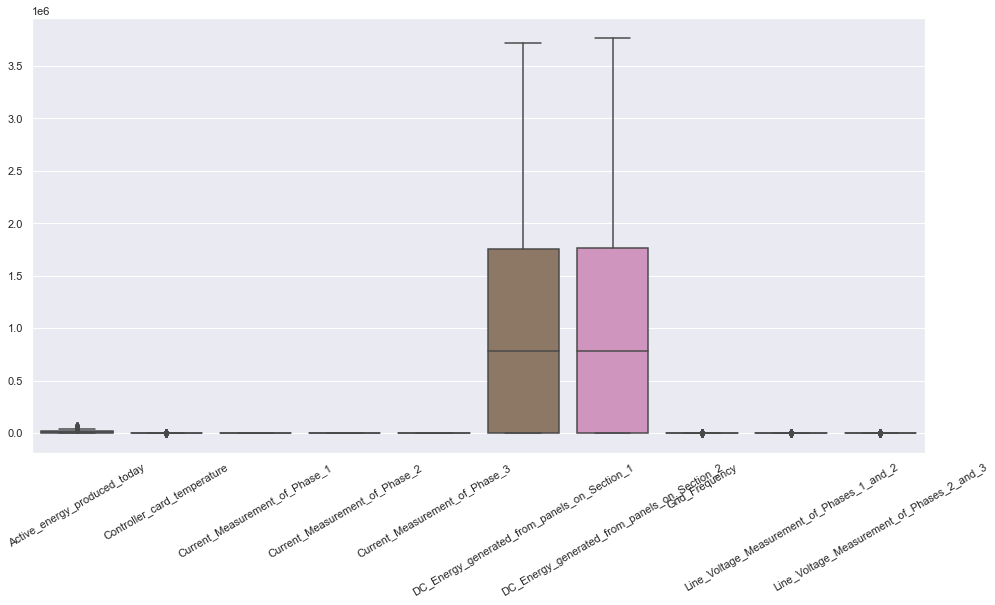

In [1503]:
ax = sns.boxplot(data=rawdata_prd[rawdata_prd.columns[0:10]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Measurement variable 1'),
 Text(1, 0, 'Measurement variable 2'),
 Text(2, 0, 'Measurement variable 3'),
 Text(3, 0, 'Measurement variable 4'),
 Text(4, 0, 'Measurement variable 5'),
 Text(5, 0, 'Measurement variable 6'),
 Text(6, 0, 'Measurement variable 7'),
 Text(7, 0, 'Measurement variable 8'),
 Text(8, 0, 'Measurement variable 9'),
 Text(9, 0, 'Measurement variable 10')]

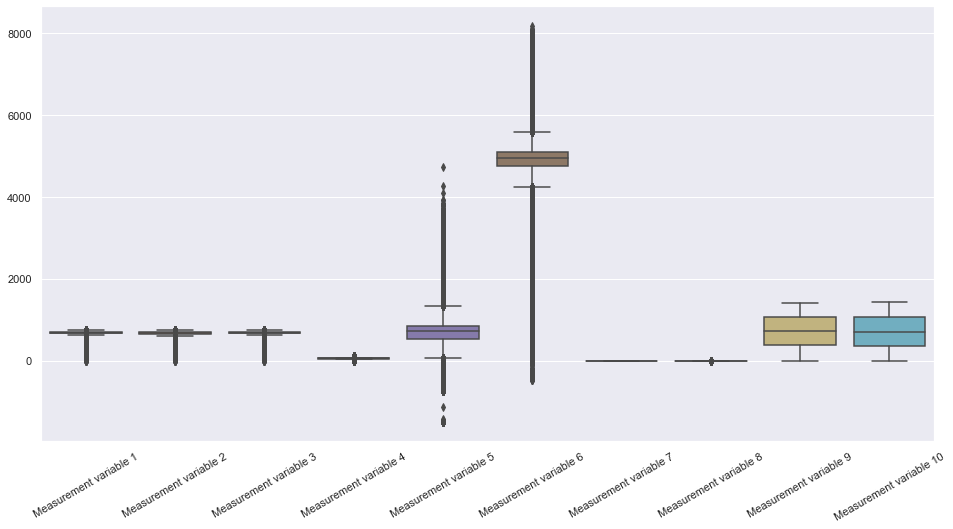

In [11]:
ax = sns.boxplot(data=rawdata_prd[rawdata_prd.columns[10:20]])
ax.set_xticklabels(['Measurement variable %s'%str(i) for  i in range(1,11)],rotation=30)

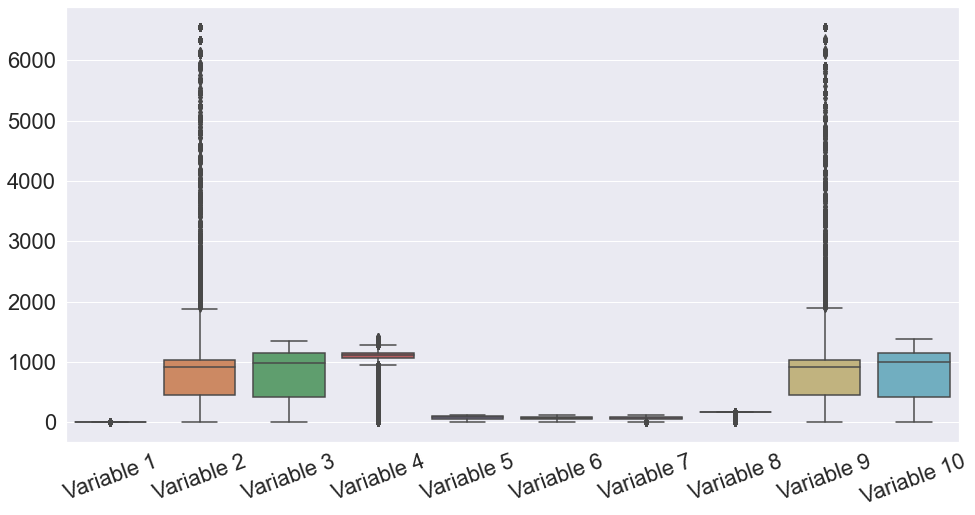

In [19]:
sns.set(font_scale = 2)
ax = sns.boxplot(data=rawdata_prd[rawdata_prd.columns[20:30]])
ax.set_xticklabels(['Variable %s'%str(i) for  i in range(1,11)],rotation=20)
plt.savefig('bwplot.png')

[Text(0, 0, 'Section_2_DC_Voltage_Measurement'),
 Text(1, 0, 'Section_2_Phase_1_power_module_temperature'),
 Text(2, 0, 'Section_2_Phase_2_power_module_temperature'),
 Text(3, 0, 'Section_2_Phase_3_power_module_temperature'),
 Text(4, 0, 'Section_2_Status'),
 Text(5, 0, 'Temperature_1-DC_connections_cabinet_ambient_temperature'),
 Text(6, 0, 'Temperature_10-Coolant_temperature_at_the_output_of_the_power_ca'),
 Text(7, 0, 'Temperature_11-External_ambient_temperature'),
 Text(8, 0, 'Temperature_2-AC_connections_cabinet_ambient_temperature'),
 Text(9, 0, 'Temperature_3-Section_1_temperature_of_inductance_core')]

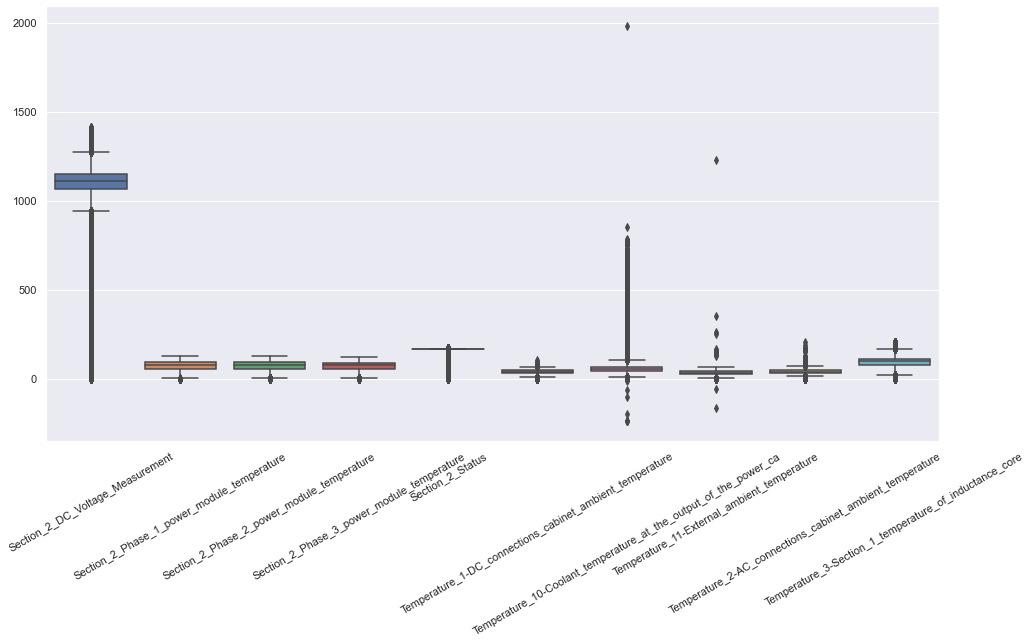

In [7]:
ax = sns.boxplot(data=rawdata_prd[rawdata_prd.columns[30:40]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Temperature_4-Section_1_temperature_of_inductance_coil'),
 Text(1, 0, 'Temperature_5-Section_2_temperature_of_inductance_core'),
 Text(2, 0, 'Temperature_6-Section_2_temperature_of_inductance_coil'),
 Text(3, 0, 'Temperature_7-Power_cabinet_ambient_temperature'),
 Text(4, 0, 'Temperature_8-Control_cabinet_ambient_temperature'),
 Text(5, 0, 'Temperature_9-Coolant_temperature_at_the_input_of_the_power_cabi'),
 Text(6, 0, 'Total_Active_Energy_fed_into_the_grid_by_inverter'),
 Text(7, 0, 'Total_Active_Power_Measurement'),
 Text(8, 0, 'Total_Apparent_Power_Measurement'),
 Text(9, 0, 'Total_Capacitive_Reactive_Energy_in_the_inverter')]

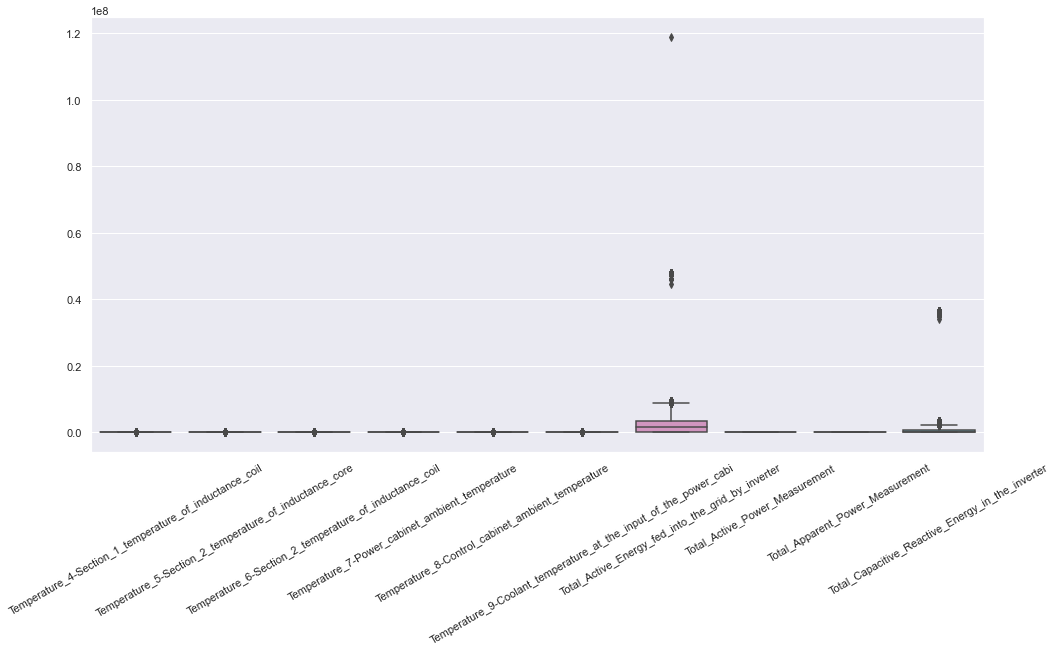

In [8]:
ax = sns.boxplot(data=rawdata_prd[rawdata_prd.columns[40:50]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Total_Inductive_Reactive_Energy_in_the_inverter'),
 Text(1, 0, 'Total_Reactive_Power_Measurement'),
 Text(2, 0, 'ERR0607'),
 Text(3, 0, 'AmbientTemperature'),
 Text(4, 0, 'IrradiationHorizontal'),
 Text(5, 0, 'IrradiationInCline'),
 Text(6, 0, 'SoilingIndex'),
 Text(7, 0, 'ModuleTemperature'),
 Text(8, 0, 'RUL')]

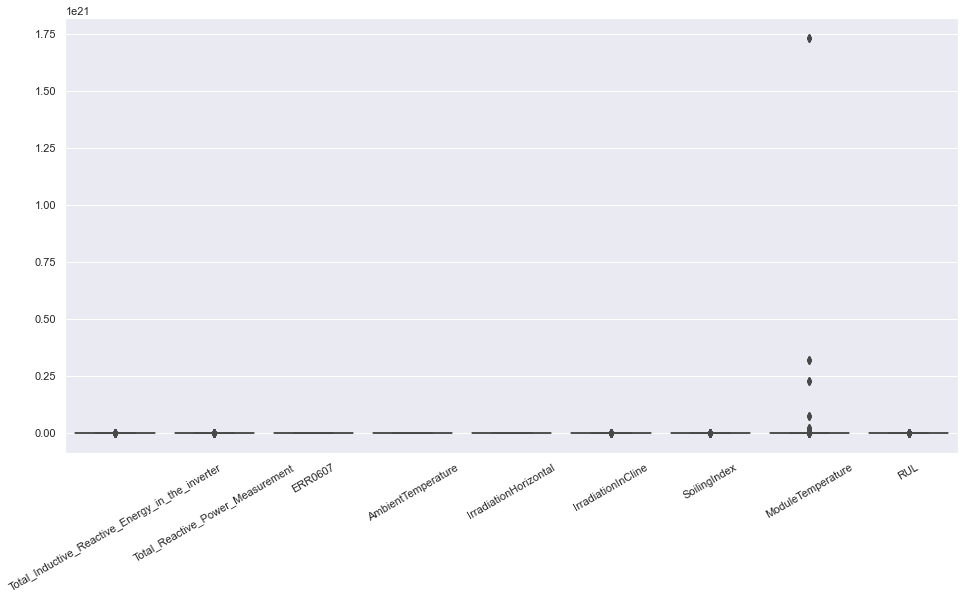

In [9]:
ax = sns.boxplot(data=rawdata_prd[rawdata_prd.columns[50:59]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [79]:
A_1 = rawdata_prd['Section_1_DC_Current_Measurement'].quantile(0.99)
A_2 = rawdata_prd['Section_2_DC_Current_Measurement'].quantile(0.99)
T_2 = rawdata_prd['Temperature_2-AC_connections_cabinet_ambient_temperature'].quantile(0.99)
T_11 = rawdata_prd['Temperature_11-External_ambient_temperature'].quantile(0.99)
T_10 = rawdata_prd['Temperature_10-Coolant_temperature_at_the_output_of_the_power_ca'].quantile(0.99)
T_9 = rawdata_prd['Total_Active_Energy_fed_into_the_grid_by_inverter'].quantile(0.99)
P_IH = rawdata_prd['Liquid_Cooling_input_presure'].quantile(0.99)
P_OH = rawdata_prd['Liquid_Cooling_output_presure'].quantile(0.99)
P_G1 = rawdata_prd['DC_Energy_generated_from_panels_on_Section_1'].quantile(0.99)
P_G2 = rawdata_prd['DC_Energy_generated_from_panels_on_Section_2'].quantile(0.99)
P_T = rawdata_prd['Total_Active_Energy_fed_into_the_grid_by_inverter'].quantile(0.99)
P_R = rawdata_prd['Total_Capacitive_Reactive_Energy_in_the_inverter'].quantile(0.99)
T_M = rawdata_prd['ModuleTemperature'].quantile(0.98)
P_2L = rawdata_prd['Section_2_DC_Voltage_Measurement'].quantile(0.02)
P_1L = rawdata_prd['Section_1_DC_Voltage_Measurement'].quantile(0.02)
P_IL = rawdata_prd['Liquid_Cooling_input_presure'].quantile(0.02)
P_OL = rawdata_prd['Liquid_Cooling_output_presure'].quantile(0.02)
T_10_L = rawdata_prd['Temperature_10-Coolant_temperature_at_the_output_of_the_power_ca'].quantile(0.01)
T_2_L = rawdata_prd['Temperature_11-External_ambient_temperature'].quantile(0.01)
S_L = rawdata_prd['SoilingIndex'].quantile(0.02)





rawdata_prd = rawdata_prd[(rawdata_prd['Section_1_DC_Current_Measurement']<A_1)&
                         (rawdata_prd['Section_2_DC_Current_Measurement']<A_2)&
                            (rawdata_prd['Temperature_2-AC_connections_cabinet_ambient_temperature']<T_2)&
                         (rawdata_prd['Temperature_11-External_ambient_temperature']<T_11)&
                         (rawdata_prd['Temperature_10-Coolant_temperature_at_the_output_of_the_power_ca']<T_10)&
                         (rawdata_prd['Temperature_11-External_ambient_temperature']>T_2_L)&
                         (rawdata_prd['Temperature_10-Coolant_temperature_at_the_output_of_the_power_ca']>T_10_L)&
                         (rawdata_prd['Temperature_9-Coolant_temperature_at_the_input_of_the_power_cabi']<T_9)&
                         (rawdata_prd['Liquid_Cooling_input_presure']<P_IH)&
                          (rawdata_prd['Liquid_Cooling_output_presure']<P_OH)&
                          (rawdata_prd['DC_Energy_generated_from_panels_on_Section_1']<P_G1)&
                          (rawdata_prd['DC_Energy_generated_from_panels_on_Section_2']<P_G2)&
                          (rawdata_prd['Section_2_DC_Voltage_Measurement']>P_2L)&
                          (rawdata_prd['Section_1_DC_Voltage_Measurement']>P_1L)&
                          (rawdata_prd['Liquid_Cooling_input_presure']>0)&
                          (rawdata_prd['Liquid_Cooling_output_presure']>0)&
                         (rawdata_prd['Total_Active_Energy_fed_into_the_grid_by_inverter']<P_T)&
                          (rawdata_prd['Total_Capacitive_Reactive_Energy_in_the_inverter']<P_R)&
                         (rawdata_prd['ModuleTemperature']<T_M)&
                         (rawdata_prd['SoilingIndex']>S_L)]

In [ ]:
rawdata_prd = rawdata_prd.reset_index() 

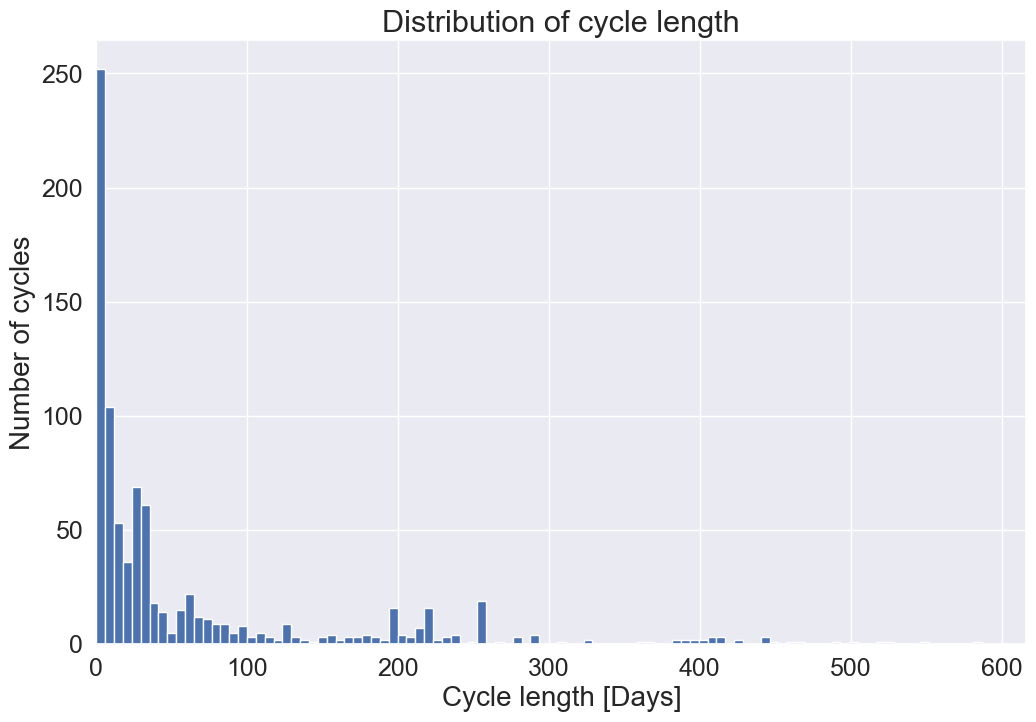

In [28]:
df_max_rul = rawdata_prd[['Cycle_ID', 'RUL']].groupby('Cycle_ID').max()
plt.figure(frameon=False, dpi=100)
df_max_rul['RUL'].hist(bins=100, figsize=(12, 8))
plt.xlim(0)
plt.xlabel('Cycle length [Days]', fontsize  = 20)
plt.ylabel('Number of cycles', fontsize  = 20)
plt.title('Distribution of cycle length', fontsize  = 22)
plt.xticks(fontsize  = 18)
plt.yticks(fontsize  = 18)
plt.savefig('ruldist_v2.png')
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    return [rmse, variance]

In [80]:
def reCycle(dataframe, from_RUL, to_RUL, minimal_length, cycle_column = 'Cycle_ID', RUL_column = 'RUL', random_state = 1, min_end = 100):
    rd = np.random.RandomState(random_state)
    newdata = pd.DataFrame()
    for cyc in np.unique(dataframe[cycle_column]):
        cycsize = len(np.unique(dataframe[(dataframe[cycle_column] == cyc)]['RUL']))
        if cycsize >= minimal_length:
            try:
                new_end = rd.randint((to_RUL+1),min(min_end,(min(cycsize,from_RUL)) - minimal_length))
            except: 
                new_end = to_RUL
            print(cyc, ' : ',new_end, ',', cycsize)
            recycled = dataframe[(dataframe[RUL_column] >= new_end)&(dataframe[cycle_column] == cyc)]
            newdata = newdata.append(recycled, ignore_index = True)
        else:
            pass
    return newdata

In [81]:
rawdata_prd = rawdata_prd.drop('rowid_inv', axis = 1)

In [84]:
rawdata_prd = rawdata_prd.drop('ERR0607', axis = 1)

In [86]:
recycled_raw = reCycle(rawdata_prd, 3000, 1, 2,'Cycle_ID','RUL', random_state = 84)

0  :  12 , 30
1  :  91 , 391
2  :  26 , 34
3  :  16 , 22
4  :  3 , 8
5  :  2 , 61
6  :  2 , 5
7  :  99 , 282
8  :  12 , 17
9  :  1 , 3
11  :  70 , 153
12  :  35 , 259
13  :  27 , 34
14  :  15 , 22
15  :  3 , 8
16  :  33 , 61
18  :  74 , 321
19  :  48 , 60
20  :  2 , 14
21  :  50 , 94
24  :  48 , 76
26  :  70 , 426
27  :  6 , 44
28  :  6 , 11
29  :  9 , 12
30  :  20 , 57
32  :  4 , 463
33  :  2 , 7
34  :  3 , 6
35  :  2 , 6
36  :  12 , 16
37  :  5 , 8
38  :  14 , 61
39  :  12 , 16
41  :  19 , 449
42  :  2 , 10
43  :  3 , 13
44  :  3 , 6
45  :  11 , 22
46  :  2 , 8
47  :  12 , 61
48  :  2 , 16
49  :  69 , 109
50  :  2 , 5
52  :  32 , 80
53  :  5 , 362
54  :  17 , 29
55  :  22 , 27
56  :  3 , 8
57  :  43 , 61
58  :  55 , 169
59  :  26 , 117
62  :  13 , 30
63  :  94 , 127
65  :  1 , 4
66  :  18 , 279
67  :  6 , 29
68  :  20 , 27
69  :  3 , 7
70  :  1 , 2
71  :  4 , 7
72  :  1 , 4
73  :  4 , 8
74  :  15 , 43
75  :  8 , 23
77  :  79 , 86
78  :  17 , 89
79  :  19 , 327
80  :  51 , 63
81  :  1

661  :  29 , 207
662  :  15 , 31
663  :  2 , 16
665  :  4 , 13
668  :  1 , 2
673  :  1 , 3
674  :  1 , 2
675  :  1 , 2
676  :  1 , 3
677  :  1 , 3
679  :  26 , 179
680  :  24 , 44
681  :  2 , 35
682  :  58 , 465
685  :  54 , 194
686  :  9 , 15
687  :  9 , 12
688  :  3 , 6
689  :  1 , 2
690  :  1 , 2
691  :  4 , 10
692  :  1 , 2
693  :  1 , 4
694  :  2 , 5
695  :  3 , 9
696  :  4 , 9
698  :  2 , 5
699  :  2 , 5
700  :  3 , 7
701  :  3 , 13
702  :  7 , 31
703  :  3 , 15
704  :  4 , 7
705  :  2 , 6
706  :  1 , 2
707  :  3 , 30
708  :  66 , 136
710  :  54 , 259
712  :  50 , 166
714  :  11 , 42
715  :  1 , 4
716  :  1 , 3
717  :  19 , 43
718  :  40 , 53
719  :  4 , 7
720  :  1 , 2
721  :  22 , 25
722  :  2 , 9
723  :  1 , 2
724  :  1 , 2
725  :  2 , 25
727  :  30 , 247
728  :  7 , 11
729  :  4 , 13
730  :  14 , 498
732  :  8 , 407
733  :  1 , 3
735  :  2 , 258
736  :  13 , 35
737  :  3 , 217
738  :  27 , 100
740  :  9 , 258
741  :  3 , 35
742  :  23 , 92
744  :  22 , 258
745  :  15 , 35
746

In [263]:
trains_hmm, tests_hmm = train_test_split(np.unique(recycled_raw['Cycle_ID']), test_size = 0.3, random_state = 1)

In [408]:
X_hmm_trn = rawdata_prd[(rawdata_prd['Cycle_ID'].isin(trains_hmm))]
y_hmm_trn = rawdata_prd[(rawdata_prd['Cycle_ID'].isin(trains_hmm))]['RUL']
X_hmm_tst = recycled_raw[(recycled_raw['Cycle_ID'].isin(tests_hmm))]
y_hmm_tst = recycled_raw[(recycled_raw['Cycle_ID'].isin(tests_hmm))]['RUL']

In [409]:
X_hmm_trn = X_hmm_trn.reset_index()
y_hmm_trn = y_hmm_trn.reset_index()
X_hmm_tst = X_hmm_tst.reset_index()
y_hmm_tst = y_hmm_tst.reset_index()

In [410]:
X_hmm_trn = X_hmm_trn.drop('index', axis = 1)
y_hmm_trn = y_hmm_trn.drop('index', axis = 1)
X_hmm_tst = X_hmm_tst.drop('index', axis = 1)
y_hmm_tst = y_hmm_tst.drop('index', axis = 1)

In [411]:
extents_trn = []
for cyc in np.unique(X_hmm_trn['Cycle_ID']):
    extents_trn.append((X_hmm_trn[(X_hmm_trn['Cycle_ID'] == cyc)]['RUL'].idxmax(),X_hmm_trn[(X_hmm_trn['Cycle_ID'] == cyc)]['RUL'].idxmin()))

In [412]:
extents_tst = []
for cyc in np.unique(X_hmm_tst['Cycle_ID']):
    extents_tst.append((X_hmm_tst[(X_hmm_tst['Cycle_ID'] == cyc)]['RUL'].idxmax(),X_hmm_tst[(X_hmm_tst['Cycle_ID'] == cyc)]['RUL'].idxmin()))

In [413]:
X_hmm_trn = X_hmm_trn.drop('RUL', axis = 1)
X_hmm_tst = X_hmm_tst.drop('RUL', axis = 1)

In [ ]:
#X_hmm_trn = X_hmm_trn.drop('rowid_inv', axis = 1)
X_hmm_tst = X_hmm_tst.drop('rowid_inv', axis = 1)

In [271]:
from sklearn.preprocessing import StandardScaler as sc
sc = sc()
X_hmm_trn = sc.fit_transform(X_hmm_trn)
X_hmm_tst = sc.transform(X_hmm_tst)
#X_test = sc.transform(X_test)

In [272]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
pca = PCA()
pca.fit(X_hmm_trn)
data_trn = pca.transform(X_hmm_trn)
data_tst = pca.transform(X_hmm_tst)


exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig2 = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}, title = 'Explained variance plot for PCA'
)
fig2.update_layout(title_x=0.5)
fig2.update_layout(
    font_family="Calibri",
    font_color="black",
    title_font_family="Calibri",
    title_font_color="black",
    font_size = 20
)
fig2.show()

In [273]:
pca2 = PCA(n_components = 3)
pca2.fit(X_hmm_trn)
data_trn = pca2.transform(X_hmm_trn)
data_test = pca2.transform(X_hmm_tst)

In [274]:
X_hmm_trn = pd.DataFrame(data_trn)
X_hmm_tst = pd.DataFrame(data_test)

In [275]:
y_hmm_trn = pd.DataFrame(y_hmm_trn)
y_hmm_tst = pd.DataFrame(y_hmm_tst)

In [2002]:
results_mse = pd.DataFrame(index = range(100, 500, 100))
results_rmse = pd.DataFrame(index = range(100, 500, 100))
results_r2 = pd.DataFrame(index = range(100, 500, 100))
for mdepth in tqdm(range(5,30,5)):
    colres_mse = []
    colres_rmse = []
    colres_r2 = []
    for n_est in range(100, 500, 100):
        mser = []
        rmser = []
        r2r = []
        for rs in range(5):
            forest = RF(n_jobs = -2, max_depth = mdepth, n_estimators = n_est, random_state = rs)

            forest.fit(X_train, y_train)
            y_pred_forest = forest.predict(X_test)
            
            mser.append(mean_squared_error(y_test, y_pred_forest))
            rmser.append(np.sqrt(mean_squared_error(y_test, y_pred_forest)))
            r2r.append(r2_score(y_test, y_pred_forest))
            # y_all = np.vstack([y_test.values,y_pred])
        colres_mse.append(np.mean(mser))
        colres_rmse.append(np.mean(rmser))
        colres_r2.append(np.mean(r2r))
    results_rmse[mdepth] = colres_rmse
    results_mse[mdepth] = colres_mse
    results_r2[mdepth] = colres_r2

100%|██████████| 5/5 [7:52:02<00:00, 5664.59s/it]  


In [2012]:
round(results_rmse,2)

,5,10,15,20,25
100,20.26,20.14,20.20,20.19,20.19
200,20.27,20.18,20.21,20.21,20.21
300,20.26,20.16,20.18,20.17,20.17
400,20.26,20.16,20.18,20.18,20.17


In [2014]:
round(results_mse,2)

,5,10,15,20,25
100,410.42,405.44,408.00,407.67,407.66
200,410.76,407.06,408.52,408.35,408.31
300,410.44,406.37,407.15,406.89,406.85
400,410.65,406.37,407.24,407.06,407.01


In [2016]:
round(results_r2,3)

,5,10,15,20,25
100,0.235,0.245,0.240,0.241,0.241
200,0.235,0.242,0.239,0.239,0.239
300,0.235,0.243,0.241,0.242,0.242
400,0.235,0.243,0.241,0.242,0.242


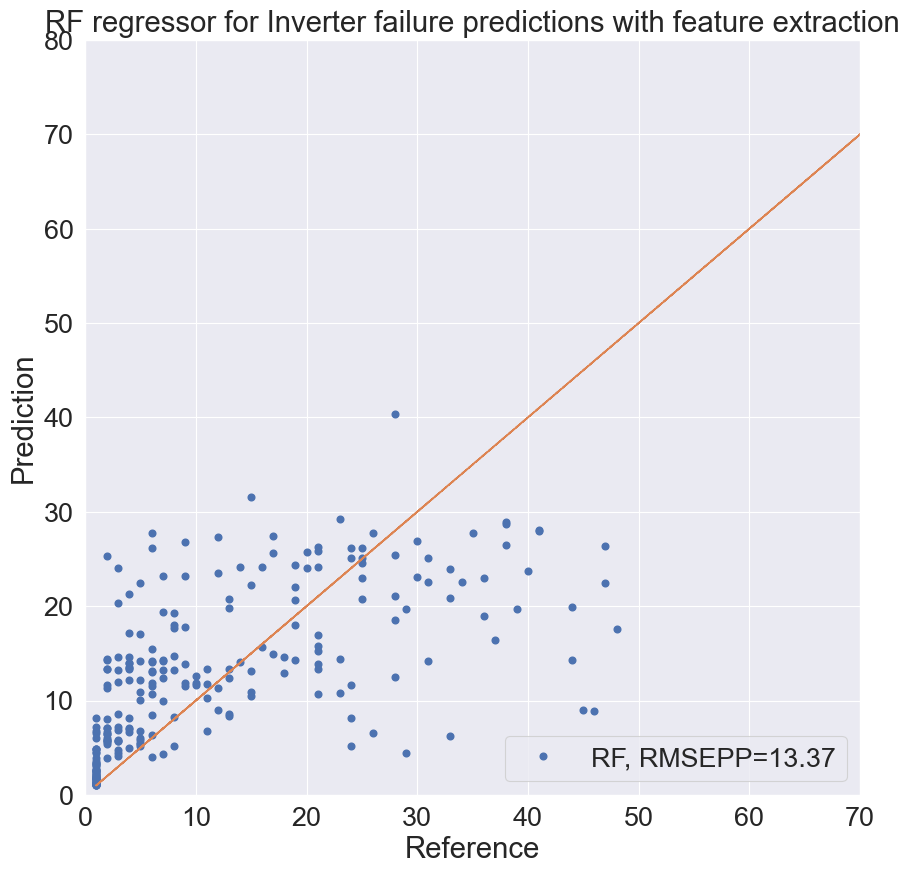

MSE test: 178.841
RMSE test: 13.373
R^2 test: 0.366


In [403]:
forest = RF(n_jobs = -3, max_depth = 10, n_estimators = 400)

forest.fit(X_train, y_train)
y_pred_forest= forest.predict(X_test)

#y_pred_forest = forest.predict(X_hmm_trn)
# y_all = np.vstack([y_test.values,y_pred])

RMSEPP_rf = np.sqrt(np.mean(np.power(y_test-y_pred_forest, 2)))
plt.figure(1, figsize=(10, 10), frameon=False, dpi=100)
plt.plot(y_test, y_pred_forest, 'o', label="RF, RMSEPP={0:.2f}".format(RMSEPP_rf))
plt.plot(y_test, y_test, '--')
plt.xlabel('Reference')
plt.ylabel('Prediction')
plt.xlim(0,70)
plt.ylim(0,80)
plt.title('RF regressor for Inverter failure predictions with feature extraction')
plt.legend(loc='lower right')
#plt.savefig('RF_Inv_med')
plt.show()

print('MSE test: %.3f' % (
        # mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_pred_forest)))
print('RMSE test: %.3f' % (
        # np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_forest))))
print('R^2 test: %.3f' % (
        # r2_score(y_train, y_train_pred),
        r2_score(y_test, y_pred_forest)))

In [102]:
predictions_rf = [[] for num in range(250)]
ground_truth = [[] for num in range(250)]
for num in range(len(y_pred_forest)):
    #predictions[int(y_pred_forest[num])].append(y_test[num])
    predictions_rf[int(y_test[num])].append(y_pred_forest[num])
    ground_truth[int(y_test[num])].append(y_test[num])

In [103]:
errors = [[] for num in range(250)]

In [104]:
predictions = [p for p in predictions if str(p) != 'nan']
ground_truth = [g for g in ground_truth if str(g) != 'nan']
predictions_rf = [p for p in predictions_rf if len(p) > 0]
ground_truth = [g for g in ground_truth if len(g) > 0]
#errors = [e for e in errors if str(e) != 'nan']

In [109]:
for num in range(len(predictions_rf)):
    errors[num] = np.std(predictions_rf[num])
    predictions_rf[num] = np.mean(predictions_rf[num])
    ground_truth[num] = np.mean(ground_truth[num])
    

In [122]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(layout = go.Layout(
title = 'Predictions of remaining useful lifetime, with error bars showing mean error',
yaxis = dict(title = 'Predicted RUL [Days]'),
xaxis = dict(title = 'Actual RUL [Days]'),
                 width=1000, height=800),  
                data=go.Scatter(
        x=ground_truth,
        y=predictions_rf,
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=errors,
            visible=True), name = 'Prediction mean values'
    ))
fig.update_layout(title_text='Predictions of RUL, with error bars showing standard deviation', title_x=0.5)
fig.update_layout(
    font_family="Calibri",
    font_color="black",
    title_font_family="Calibri",
    title_font_color="black",
    font_size = 22
)
fig.update_layout(
    legend_font_size = 20
)
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.1,
    xanchor="right",
    x=0.99
))
fig.add_trace(go.Scatter(x=y_test, y=y_pred_forest, mode = "markers", name = 'Predictions'))
fig.show()


In [ ]:
RMSEPP_rf = np.sqrt(np.mean(np.power(y_test_hmm.values-y_pred_forest_hmm, 2)))

In [211]:
imps = forest.feature_importances_

In [212]:
importances = {}
for num, impo in enumerate(imps):
    if impo > 0:
        print(X_train.columns[num], impo)
        importances[X_train.columns[num]] = impo

Unnamed: 0 1.4079428867748845e-07
Total_Active_Power_Measurement__has_duplicate 1.3557142210990137e-07
Section_1_Phase_2_power_module_temperature__fft_aggregated__aggtype_"centroid" 0.0006408066903719201
Section_2_Phase_1_power_module_temperature__fft_aggregated__aggtype_"centroid" 5.75299703421545e-05
Section_2_Phase_2_power_module_temperature__fft_aggregated__aggtype_"centroid" 0.0003291884278711882
Section_1_Phase_3_power_module_temperature__fft_aggregated__aggtype_"centroid" 5.709326675250697e-05
Section_2_Phase_3_power_module_temperature__fft_aggregated__aggtype_"centroid" 4.250918877155735e-06
Section_2_Phase_2_power_module_temperature__fft_aggregated__aggtype_"variance" 0.00010157696475573667
Section_2_Phase_3_power_module_temperature__fft_aggregated__aggtype_"variance" 5.071462492067637e-05
Section_1_Phase_3_power_module_temperature__fft_aggregated__aggtype_"variance" 3.6919839540513535e-06
Section_2_Phase_1_power_module_temperature__fft_aggregated__aggtype_"variance" 5.0184532

Temperature_10-Coolant_temperature_at_the_output_of_the_power_ca__number_peaks__n_50 4.756697050712051e-06
Total_Active_Energy_fed_into_the_grid_by_inverter__fft_coefficient__attr_"abs"__coeff_1 1.994133989018842e-05
Temperature_2-AC_connections_cabinet_ambient_temperature__percentage_of_reoccurring_values_to_all_values 4.406710894807954e-06
Temperature_2-AC_connections_cabinet_ambient_temperature__percentage_of_reoccurring_datapoints_to_all_datapoints 5.9968134892450695e-06
Temperature_2-AC_connections_cabinet_ambient_temperature__ratio_value_number_to_time_series_length 1.0669769165481946e-07
Total_Apparent_Power_Measurement__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC" 5.037621349542056e-07
Liquid_Cooling_output_presure__approximate_entropy__m_2__r_0.1 4.901734449360948e-05
Current_Measurement_of_Phase_1__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC" 1.8584468978924467e-07
Total_Capacitive_Reactive_Energy_in_the_inverter__agg_autocorrelation__f_agg_"mean"__maxlag_

Line_Voltage_Measurement_of_Phases_3_and_1__fft_coefficient__attr_"abs"__coeff_6 8.311034051700789e-06
Temperature_5-Section_2_temperature_of_inductance_core__fft_coefficient__attr_"abs"__coeff_7 6.128792976549802e-05
Controller_card_temperature__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"min" 5.332525491419153e-07
Temperature_9-Coolant_temperature_at_the_input_of_the_power_cabi__autocorrelation__lag_2 7.431770035246572e-06
Section_1_DC_Voltage_Measurement__cwt_coefficients__coeff_3__w_20__widths_(2, 5, 10, 20) 4.5030747189121376e-07
Section_2_DC_Voltage_Measurement__minimum 0.000226332945823822
Section_2_Phase_1_power_module_temperature__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20) 3.7695938709918577e-07
Temperature_6-Section_2_temperature_of_inductance_coil__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20) 9.626403561999033e-07
Current_Measurement_of_Phase_3__permutation_entropy__dimension_6__tau_1 5.653181856287285e-06
Section_1_Phase_3_power_module_tempera

Section_2_DC_Current_Measurement__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20) 5.0969108403722775e-09
Section_2_Phase_3_power_module_temperature__fft_coefficient__attr_"abs"__coeff_15 4.617024591880504e-06
Current_Measurement_of_Phase_2__fft_coefficient__attr_"abs"__coeff_6 5.386099694847703e-05
Section_2_Phase_1_power_module_temperature__fourier_entropy__bins_10 1.9286510033594695e-05
Section_2_Phase_1_power_module_temperature__fft_coefficient__attr_"abs"__coeff_15 1.8019885222979554e-06
Section_1_Phase_2_power_module_temperature__cwt_coefficients__coeff_11__w_20__widths_(2, 5, 10, 20) 9.150808943423914e-08
Current_Measurement_of_Phase_3__fft_coefficient__attr_"abs"__coeff_6 9.146177834813254e-07
Section_1_Status__energy_ratio_by_chunks__num_segments_10__segment_focus_9 8.00160408381923e-07
DC_Energy_generated_from_panels_on_Section_2__fft_coefficient__attr_"angle"__coeff_10 0.00014873210018578932
Temperature_11-External_ambient_temperature__change_quantiles__f_agg_"var"__is

Current_Measurement_of_Phase_2__fourier_entropy__bins_10 5.948152435529331e-06
Line_Voltage_Measurement_of_Phases_1_and_2__fourier_entropy__bins_2 1.0589224498592919e-07
Temperature_2-AC_connections_cabinet_ambient_temperature__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.6 1.156048715333968e-07
Total_Active_Power_Measurement__fft_coefficient__attr_"abs"__coeff_20 1.267280852147897e-05
Section_1_DC_Power_Measurement__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6 6.098842000180455e-06
Total_Capacitive_Reactive_Energy_in_the_inverter__agg_autocorrelation__f_agg_"var"__maxlag_40 7.382700805249069e-07
Power_Factor__percentage_of_reoccurring_values_to_all_values 9.865054998159253e-08
Temperature_4-Section_1_temperature_of_inductance_coil__cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20) 8.34917378364163e-05
AmbientTemperature__lempel_ziv_complexity__bins_100 6.834959899956973e-05
DC_Energy_generated_from_panels_on_Section_1__fft_coefficient__attr_"angle"__coeff

Section_2_Phase_2_power_module_temperature__fft_coefficient__attr_"abs"__coeff_23 1.5895154540632527e-08
Section_2_DC_Voltage_Measurement__fft_coefficient__attr_"abs"__coeff_27 8.798173553574609e-05
Liquid_Cooling_input_presure__matrix_profile__feature_"min"__threshold_0.98 0.0001682803790758798
Active_energy_produced_today__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"max" 1.0173973943569395e-05
Section_1_Phase_1_power_module_temperature__agg_autocorrelation__f_agg_"mean"__maxlag_40 1.0147425130171843e-07
Total_Inductive_Reactive_Energy_in_the_inverter__energy_ratio_by_chunks__num_segments_10__segment_focus_9 9.510794189945028e-06
Section_1_Phase_1_power_module_temperature__fft_coefficient__attr_"abs"__coeff_23 1.6993109773667689e-07
Total_Capacitive_Reactive_Energy_in_the_inverter__fft_coefficient__attr_"angle"__coeff_11 3.685501738259623e-05
Number_of_minutes_that_the_inverter_has_been_feeding_power_into__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.8 6.5271976929

Section_2_DC_Current_Measurement__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.0 1.2179284003047016e-05
Controller_card_temperature__autocorrelation__lag_3 8.300614993859803e-05
Total_Reactive_Power_Measurement__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20) 1.2150599767837693e-07
Section_2_DC_Power_Measurement__fft_coefficient__attr_"abs"__coeff_27 3.7427614089747017e-07
Section_1_Phase_3_power_module_temperature__matrix_profile__feature_"max"__threshold_0.98 1.2026857953400426e-07
Section_2_DC_Power_Measurement__matrix_profile__feature_"mean"__threshold_0.98 7.848883437339504e-08
Section_1_DC_Power_Measurement__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20) 6.55882046034412e-06
Temperature_1-DC_connections_cabinet_ambient_temperature__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.0 3.481219330692514e-07
Active_energy_produced_today__partial_autocorrelation__lag_2 1.630549226738923e-07
Temperature_8-Control_cabinet_ambient_temperature__change_quant

Liquid_Cooling_input_presure__fft_coefficient__attr_"abs"__coeff_34 4.459035247207816e-05
Section_2_DC_Voltage_Measurement__partial_autocorrelation__lag_4 4.770340142753136e-08
Temperature_5-Section_2_temperature_of_inductance_core__cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20) 3.665744601419578e-05
Liquid_Cooling_flow__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.2 1.257790983422058e-06
Temperature_2-AC_connections_cabinet_ambient_temperature__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20) 6.017854683205952e-07
Total_Reactive_Power_Measurement__fft_coefficient__attr_"abs"__coeff_31 3.2924673197615207e-06
Active_energy_produced_today__cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20) 0.00017427228248860513
Section_1_Status__cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20) 1.5851699903922994e-06
Total_Capacitive_Reactive_Energy_in_the_inverter__fft_coefficient__attr_"imag"__coeff_12 8.72923347667503e-07
Line_Voltage_Measurement_of_Phases_2_and_3__kur

Section_1_Phase_1_power_module_temperature__quantile__q_0.1 4.808979917006361e-06
Controller_card_temperature__autocorrelation__lag_8 7.020830876831315e-06
Temperature_3-Section_1_temperature_of_inductance_core__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2 7.124060352611528e-05
Section_1_Phase_2_power_module_temperature__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20) 5.617307468854912e-09
Controller_card_temperature__matrix_profile__feature_"min"__threshold_0.98 0.00012036161105980567
Section_1_DC_Power_Measurement__autocorrelation__lag_5 7.950043442196167e-06
Section_1_Status__partial_autocorrelation__lag_8 8.384824369045214e-05
Liquid_Cooling_output_presure__permutation_entropy__dimension_3__tau_1 2.0480347390518102e-08
Temperature_3-Section_1_temperature_of_inductance_core__cwt_coefficients__coeff_7__w_10__widths_(2, 5, 10, 20) 2.0620003622172357e-06
Section_2_Status__first_location_of_minimum 0.0008110070909786425
Liquid_Cooling_flow__partial_autocorrelation__l

Power_Factor__fft_coefficient__attr_"abs"__coeff_44 2.7537897864426492e-05
Temperature_10-Coolant_temperature_at_the_output_of_the_power_ca__fft_coefficient__attr_"abs"__coeff_41 1.3655178095632413e-06
Section_1_DC_Power_Measurement__fft_coefficient__attr_"abs"__coeff_42 1.9446343329229775e-06
Section_1_DC_Current_Measurement__fft_coefficient__attr_"abs"__coeff_39 2.754152136747052e-07
Temperature_7-Power_cabinet_ambient_temperature__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"min" 3.1112373158345665e-07
Liquid_Cooling_output_presure__fft_coefficient__attr_"abs"__coeff_38 3.0053555184409754e-06
Line_Voltage_Measurement_of_Phases_2_and_3__mean_n_absolute_max__number_of_maxima_7 8.557159501138933e-08
Temperature_8-Control_cabinet_ambient_temperature__fft_coefficient__attr_"abs"__coeff_44 5.124356302984036e-05
Section_2_Phase_1_power_module_temperature__cwt_coefficients__coeff_11__w_10__widths_(2, 5, 10, 20) 1.1533816821333022e-07
Temperature_3-Section_1_temperature_of_inductanc

Temperature_4-Section_1_temperature_of_inductance_coil__quantile__q_0.9 1.5176635411740187e-05
Temperature_4-Section_1_temperature_of_inductance_coil__fft_coefficient__attr_"abs"__coeff_50 1.5320074914556557e-06
Current_Measurement_of_Phase_1__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.2 2.3789345254984665e-05
Total_Reactive_Power_Measurement__fft_coefficient__attr_"abs"__coeff_47 1.3863723974869162e-08
Total_Inductive_Reactive_Energy_in_the_inverter__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0 7.2467723649281075e-06
Temperature_8-Control_cabinet_ambient_temperature__fft_coefficient__attr_"abs"__coeff_48 3.216575489307018e-05
Active_energy_produced_today__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"var" 2.3409440456104853e-06
Temperature_11-External_ambient_temperature__fft_coefficient__attr_"abs"__coeff_52 9.500523440289196e-06
DC_Energy_generated_from_panels_on_Section_2__fft_coefficient__attr_"real"__coeff_9 7.254830069294393e-06
Temperature_6-Se

Current_Measurement_of_Phase_2__linear_trend__attr_"pvalue" 2.9412907559897455e-05
DC_Energy_generated_from_panels_on_Section_1__fft_coefficient__attr_"abs"__coeff_62 1.7206404720983753e-08
Total_Reactive_Power_Measurement__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"max" 4.9624633858452076e-06
Total_Active_Power_Measurement__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4 2.3548759889211378e-07
Temperature_2-AC_connections_cabinet_ambient_temperature__cwt_coefficients__coeff_10__w_5__widths_(2, 5, 10, 20) 2.6346976160272615e-06
Section_2_DC_Current_Measurement__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0 6.640106697134123e-06
Section_2_Status__fft_coefficient__attr_"abs"__coeff_51 2.7596522117636904e-05
Power_Factor__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.8 5.942516861036223e-05
Line_Voltage_Measurement_of_Phases_1_and_2__ratio_beyond_r_sigma__r_0.5 1.9078172450330616e-05
Temperature_6-Section_2_temperature_of_inductance_coil__fft_co

Temperature_2-AC_connections_cabinet_ambient_temperature__partial_autocorrelation__lag_3 5.875891975205312e-08
Total_Inductive_Reactive_Energy_in_the_inverter__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.4 9.584276209138793e-07
Grid_Frequency__fft_coefficient__attr_"abs"__coeff_94 1.5920362450858708e-05
ModuleTemperature__fft_coefficient__attr_"abs"__coeff_4 9.594467642311406e-07
Line_Voltage_Measurement_of_Phases_2_and_3__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.2 1.0341965197577082e-05
ModuleTemperature__ar_coefficient__coeff_10__k_10 2.488115674522007e-06
IrradiationHorizontal__fft_aggregated__aggtype_"skew" 5.304251469569115e-07
Current_Measurement_of_Phase_1__fft_coefficient__attr_"abs"__coeff_56 9.523224616936161e-07
Temperature_5-Section_2_temperature_of_inductance_core__ar_coefficient__coeff_8__k_10 3.426010076779056e-05
Section_2_DC_Current_Measurement__fft_coefficient__attr_"abs"__coeff_84 0.00019212990433128
Temperature_8-Control_cabinet_ambient_

IrradiationInCline__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"mean" 7.821389531604076e-08
Current_Measurement_of_Phase_2__fft_coefficient__attr_"abs"__coeff_65 3.8642184436015594e-05
Total_Reactive_Power_Measurement__fft_coefficient__attr_"abs"__coeff_70 5.780292749176392e-06
Section_2_DC_Power_Measurement__ar_coefficient__coeff_2__k_10 1.674889399326208e-06
Total_Active_Power_Measurement__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4 3.8221950562821495e-07
Current_Measurement_of_Phase_2__skewness 3.9330077659787785e-05
Current_Measurement_of_Phase_2__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.4 3.859648465307057e-05
Temperature_3-Section_1_temperature_of_inductance_core__mean_n_absolute_max__number_of_maxima_7 2.309034886872453e-05
DC_Energy_generated_from_panels_on_Section_1__fft_coefficient__attr_"real"__coeff_23 6.57660490718439e-08
Line_Voltage_Measurement_of_Phases_2_and_3__fft_coefficient__attr_"abs"__coeff_53 1.6358323981173304e-06
DC_Ener

Temperature_2-AC_connections_cabinet_ambient_temperature__fft_coefficient__attr_"abs"__coeff_88 0.0005639148023288102
Line_Voltage_Measurement_of_Phases_1_and_2__spkt_welch_density__coeff_5 1.5428603468027352e-05
Line_Voltage_Measurement_of_Phases_1_and_2__fft_coefficient__attr_"abs"__coeff_62 8.958283184643303e-08
Liquid_Cooling_output_presure__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"max" 2.6169081495690593e-07
Section_2_Phase_3_power_module_temperature__ratio_beyond_r_sigma__r_1.5 1.1951530423961289e-06
Liquid_Cooling_input_presure__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"min" 5.6541199243448074e-05
Current_Measurement_of_Phase_2__fft_coefficient__attr_"abs"__coeff_92 5.457122776338058e-06
Total_Apparent_Power_Measurement__cwt_coefficients__coeff_7__w_5__widths_(2, 5, 10, 20) 2.5771458515717916e-08
AmbientTemperature__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.2 6.609528447300058e-08
AmbientTemperature__change_quantiles__f_agg_"var"__isabs_Fal

Line_Voltage_Measurement_of_Phases_3_and_1__fft_coefficient__attr_"abs"__coeff_85 8.230109377196844e-05
Section_2_DC_Power_Measurement__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.2 9.449104781424269e-06
Section_2_Phase_1_power_module_temperature__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var" 4.7166389606185234e-05
Line_Voltage_Measurement_of_Phases_3_and_1__fft_coefficient__attr_"abs"__coeff_98 3.2932075379562283e-07
ModuleTemperature__maximum 2.2752903475544027e-07
Section_2_Status__fft_coefficient__attr_"abs"__coeff_85 2.3337649221898325e-05
Temperature_2-AC_connections_cabinet_ambient_temperature__ratio_beyond_r_sigma__r_2.5 6.509174100189285e-05
Total_Active_Energy_fed_into_the_grid_by_inverter__fft_coefficient__attr_"angle"__coeff_81 6.187178954799106e-05
Section_1_DC_Voltage_Measurement__quantile__q_0.9 2.165448048753153e-06
Temperature_7-Power_cabinet_ambient_temperature__fft_coefficient__attr_"abs"__coeff_96 8.929131062459014e-07
IrradiationInCline

Section_2_DC_Power_Measurement__ratio_beyond_r_sigma__r_1.5 2.8247640522818395e-05
Liquid_Cooling_output_presure__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"var" 6.0811084962051444e-05
Temperature_6-Section_2_temperature_of_inductance_coil__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"max" 1.268689056722178e-05
DC_Energy_generated_from_panels_on_Section_1__fft_coefficient__attr_"angle"__coeff_99 5.433640195049298e-06
Total_Active_Energy_fed_into_the_grid_by_inverter__fft_coefficient__attr_"imag"__coeff_58 5.641032639713095e-06
Total_Inductive_Reactive_Energy_in_the_inverter__fft_coefficient__attr_"imag"__coeff_34 1.986108376051233e-05
DC_Energy_generated_from_panels_on_Section_1__cwt_coefficients__coeff_7__w_2__widths_(2, 5, 10, 20) 6.086097295541039e-07
Section_1_Status__fft_coefficient__attr_"abs"__coeff_76 7.462342426930572e-06
AmbientTemperature__cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20) 1.483735352208367e-06
Section_2_Status__agg_linear_trend__attr_"

Section_1_DC_Voltage_Measurement__mean_abs_change 1.142795714393537e-06
Section_2_Status__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"var" 0.00012244868132537065
DC_Energy_generated_from_panels_on_Section_1__fft_coefficient__attr_"angle"__coeff_87 0.00010533423780435615
Section_1_DC_Power_Measurement__cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20) 1.0127430435297495e-06
Total_Capacitive_Reactive_Energy_in_the_inverter__fft_coefficient__attr_"abs"__coeff_71 2.327846301887275e-06
Section_1_DC_Power_Measurement__root_mean_square 8.305493084426536e-06
Temperature_6-Section_2_temperature_of_inductance_coil__fft_coefficient__attr_"angle"__coeff_8 7.794942234940672e-06
Section_2_Status__change_quantiles__f_agg_"mean"__isabs_False__qh_0.2__ql_0.0 3.243366250718981e-05
IrradiationHorizontal__cwt_coefficients__coeff_10__w_5__widths_(2, 5, 10, 20) 4.2009639113471556e-08
Liquid_Cooling_input_presure__cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20) 9.19653004008285e-06
Secti

In [213]:
importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

In [214]:
df_imp = pd.DataFrame(importances)

In [215]:
df_imp.head(10)

,0,1
0,Total_Active_Energy_fed_into_the_grid_by_inver...,0.043035
1,Total_Reactive_Power_Measurement__cid_ce__norm...,0.031918
2,Total_Active_Energy_fed_into_the_grid_by_inver...,0.031710
3,Total_Reactive_Power_Measurement__fft_coeffici...,0.022829
4,Liquid_Cooling_input_presure__cid_ce__normaliz...,0.021422
5,Line_Voltage_Measurement_of_Phases_1_and_2__ci...,0.010575
6,Section_1_DC_Voltage_Measurement__fft_coeffici...,0.009440
7,Total_Reactive_Power_Measurement__number_peaks...,0.008636
8,Section_1_DC_Voltage_Measurement__minimum,0.007296
9,Temperature_11-External_ambient_temperature__f...,0.007095


In [ ]:
RUL = recycled_raw.drop(['RUL'],axis = 1)

In [777]:
recycled_raw = recycled_raw.drop('RUL', axis = 1)

In [ ]:
recycled_raw = recycled_raw.drop(['ERR00', 'ERR01', 'ERR02', 'ERR03', 'ERR04', 'ERR05', 'ERR06', 'ERR07', 'ERR08', 'ERR09', 'ERR10', 'ERR11', 'ERR12', 'ERR13', 'ERR14', 'ERR15', 'Error_Word_0','Error_Word_1','Error_Word_10','Error_Word_11','Error_Word_12','Error_Word_13','Error_Word_14','Error_Word_15','Error_Word_2','Error_Word_3','Error_Word_4','Error_Word_5','Error_Word_6','Error_Word_7','Error_Word_8','Error_Word_9'], axis = 1)

In [ ]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction.settings import MinimalFCParameters
fresh_cycle = extract_features(recycled_raw, column_id="Cycle_ID", column_sort="rowid_inv")

In [776]:
RULs = [min(recycled_raw['RUL'][(recycled_raw['Cycle_ID']==cycle)]) for cycle in np.unique(recycled_raw['Cycle_ID'])]

In [20]:
X = fresh_cycle.drop([col for col in fresh_cycle.columns if 'RUL' in col], axis = 1)

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(X)
features_filtered = select_features(X, RULs);

In [ ]:
features_filtered.to_csv("FilteredFeatures_5.csv")
pd.DataFrame(RULs).to_csv("RULs_tsfresh_5.csv")

In [96]:
features_filtered = pd.read_csv("FilteredFeatures_4.csv")
RULs = pd.read_csv("RULs_tsfresh_4.csv")

In [97]:
RULs = np.array(RULs['0'])

In [98]:
features_filtered = features_filtered.drop([col for col in features_filtered if 'index' in col], axis = 1)

In [402]:
X_train, X_test, y_train, y_test = train_test_split(features_filtered, RULs, test_size=0.3, random_state = 1)

In [ ]:
plt.plot(y_train, label = 'Trn')
plt.plot(y_test, label = 'Tst')
plt.legend()

In [ ]:
from sklearn.preprocessing import StandardScaler as sc
sc = sc()
X = sc.fit_transform(X)
X = pd.DataFrame(X)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
X = impute(features_filtered)
pca_ts = PCA()
pca_ts.fit(features_filtered)
all_data = pca_ts.transform(features_filtered)



exp_var_cumul = np.cumsum(pca_ts.explained_variance_ratio_)

fig2 = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)
fig2.show()

In [1588]:
import numpy as np
transmat = np.array([[0.5,0.125,0.1,0.075,0.05,0.025,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.025],
                       [0,0.5,0.125,0.1,0.075,0.05,0.025,0.025,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.025], 
                       [0,0,0.5,0.125,0.1,0.075,0.05,0.05,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.025], 
                       [0,0,0,0.5,0.125,0.1,0.075,0.05,0.05,0.025,0.0125,0.0125,0.0125,0.0125,0.025], 
                       [0,0,0,0,0.5,0.125,0.1,0.075,0.05,0.05,0.025,0.025,0.0125,0.0125,0.025],
                     [0,0,0,0,0,0.5,0.125,0.1,0.075,0.05,0.025,0.025,0.025,0.025,0.05],
                       [0,0,0,0,0,0,0.5,0.125,0.1,0.075,0.05,0.05,0.025,0.025,0.05], 
                       [0,0,0,0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.0125,0.0125], 
                       [0,0,0,0,0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.025], 
                       [0,0,0,0,0,0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.05], 
                       [0,0,0,0,0,0,0,0,0,0,0.5,0.2,0.125,0.1,0.075], 
                       [0,0,0,0,0,0,0,0,0,0,0,0.5,0.275,0.125,0.1], 
                       [0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.3,0.2], 
                       [0,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0.3], 
                       [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])


startmat = np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [ ]:
pca_ts = PCA(n_components = 6)
pca_ts.fit(features_filtered)
data = pca_ts.transform(features_filtered)

In [1589]:
import numpy as np
transmat = np.array([[0.5,0.2,0.125,0.075,0.05,0.025,0.0125,0.0125,0,0,0,0,0,0,0],
                       [0,0.5,0.2,0.125,0.075,0.05,0.025,0.0125,0.0125,0,0,0,0,0,0], 
                       [0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.0125,0.0125,0,0,0,0,0], 
                       [0,0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.025,0,0,0,0,0], 
                       [0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.05,0,0,0,0,0],
                     [0,0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.0125,0.0125,0,0],
                       [0,0,0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.0125,0.0125,0], 
                       [0,0,0,0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.0125,0.0125], 
                       [0,0,0,0,0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.025], 
                       [0,0,0,0,0,0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.05], 
                       [0,0,0,0,0,0,0,0,0,0,0.5,0.2,0.125,0.1,0.075], 
                       [0,0,0,0,0,0,0,0,0,0,0,0.5,0.275,0.125,0.1], 
                       [0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.3,0.2], 
                       [0,0,0,0,0,0,0,0,0,0,0,0,0,0.7,0.3], 
                       [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

startmat = np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [ ]:
X_train_tspca, X_test_tspca, y_train_tspca, y_test_tspca = train_test_split(data, RULs, test_size=0.3)

In [135]:
import numpy as np
transmat = np.array([[0.5,0.175,0.125,0.075,0.05,0.025,0.0125,0.0125,0.0125,0.0125],
                       [0,0.5,0.2,0.125,0.075,0.05,0.025,0.0125,0.0125,0], 
                       [0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.0125,0.0125], 
                       [0,0,0,0.5,0.2,0.125,0.075,0.05,0.025,0.025], 
                       [0,0,0,0,0.5,0.2,0.125,0.075,0.05,0.05], 
                       [0,0,0,0,0,0.5,0.2,0.125,0.1,0.075], 
                       [0,0,0,0,0,0,0.5,0.275,0.125,0.1], 
                       [0,0,0,0,0,0,0,0.5,0.3,0.2], 
                       [0,0,0,0,0,0,0,0,0.7,0.3], 
                       [0,0,0,0,0,0,0,0,0,1]])

startmat = np.array([1,0,0,0,0,0,0,0,0,0])

In [1610]:
# 5.1
import numpy as np
transmat = np.array([[0.5,0.2,0.125,0.1,0.075], 
                       [0,0.5,0.275,0.125,0.1], 
                       [0,0,0.5,0.3,0.2], 
                       [0,0,0,0.7,0.3], 
                       [0,0,0,0,1]])

startmat = np.array([1,0,0,0,0])

In [1622]:
# 5.2
import numpy as np
transmat = np.array([[0.6,0.15,0.1125,0.0875,0.05], 
                       [0,0.7,0.15,0.1,0.05], 
                       [0,0,0.7,0.2,0.1], 
                       [0,0,0,0.8,0.2], 
                       [0,0,0,0,1]])

startmat = np.array([1,0,0,0,0])

In [281]:
from hmmlearn import hmm
lr = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter = 1000, params = 'tmc', init_params = 'mc', random_state=1)
lr.startprob_ = startmat
lr.transmat_ = transmat

In [418]:
extents_trn = [tup for tup in extents_trn if tup[-1]>(tup[0])]
extents_tst = [tup for tup in extents_tst if tup[-1]>(tup[0])]

In [419]:
# v2
from tqdm import tqdm
from hmmlearn import hmm
results = []
ground_truth = []
results_trn = []
for RS in tqdm(range(20)):
    lr = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter = 1000, params = 'tmc', init_params = 'mc', random_state=RS)
    lr.startprob_ = startmat
    lr.transmat_ = transmat
    lr.fit(np.concatenate([X_hmm_trn.iloc[extent[0]:extent[1]] for extent in extents_trn if len(X_hmm_trn.iloc[extent[0]:extent[1]])>0]), [len(X_hmm_trn.iloc[extent[0]:extent[1]]) for extent in extents_trn if len(X_hmm_trn.iloc[extent[0]:extent[1]])>0])
    preds = []
    refs = []
    preds_trn = []
    refs_trn = []
    for split in extents_tst:
        preds.append(lr.predict(X_hmm_tst.iloc[split[0]:split[1]]))
        refs.append(y_hmm_tst.iloc[split[0]:split[1]].values)
    for split in extents_trn:
        preds_trn.append(lr.predict(X_hmm_trn.iloc[split[0]:split[1]]))
        refs_trn.append(y_hmm_trn.iloc[split[0]:split[1]].values)
    results.append(preds)
    results_trn.append(preds_trn)
    ground_truth.append(refs)

100%|██████████| 20/20 [3:25:50<00:00, 617.51s/it]  


In [420]:
predictions = []
for j in range(len(results[0])):
    predictions.append([])
    for k in range(len(results[0][j])):
        pointpreds = []
        for m in range(len(results)):
            pointpreds.append(results[m][j][k])
        predictions[j].append(int(np.mean(pointpreds)))

In [421]:
predictions_trn = []
for j in range(len(results_trn[0])):
    predictions_trn.append([])
    for k in range(len(results_trn[0][j])):
        pointpreds_trn = []
        for m in range(len(results_trn)):
            pointpreds_trn.append(results_trn[m][j][k])
        predictions_trn[j].append(int(np.mean(pointpreds_trn)))

<Figure size 1280x720 with 0 Axes>

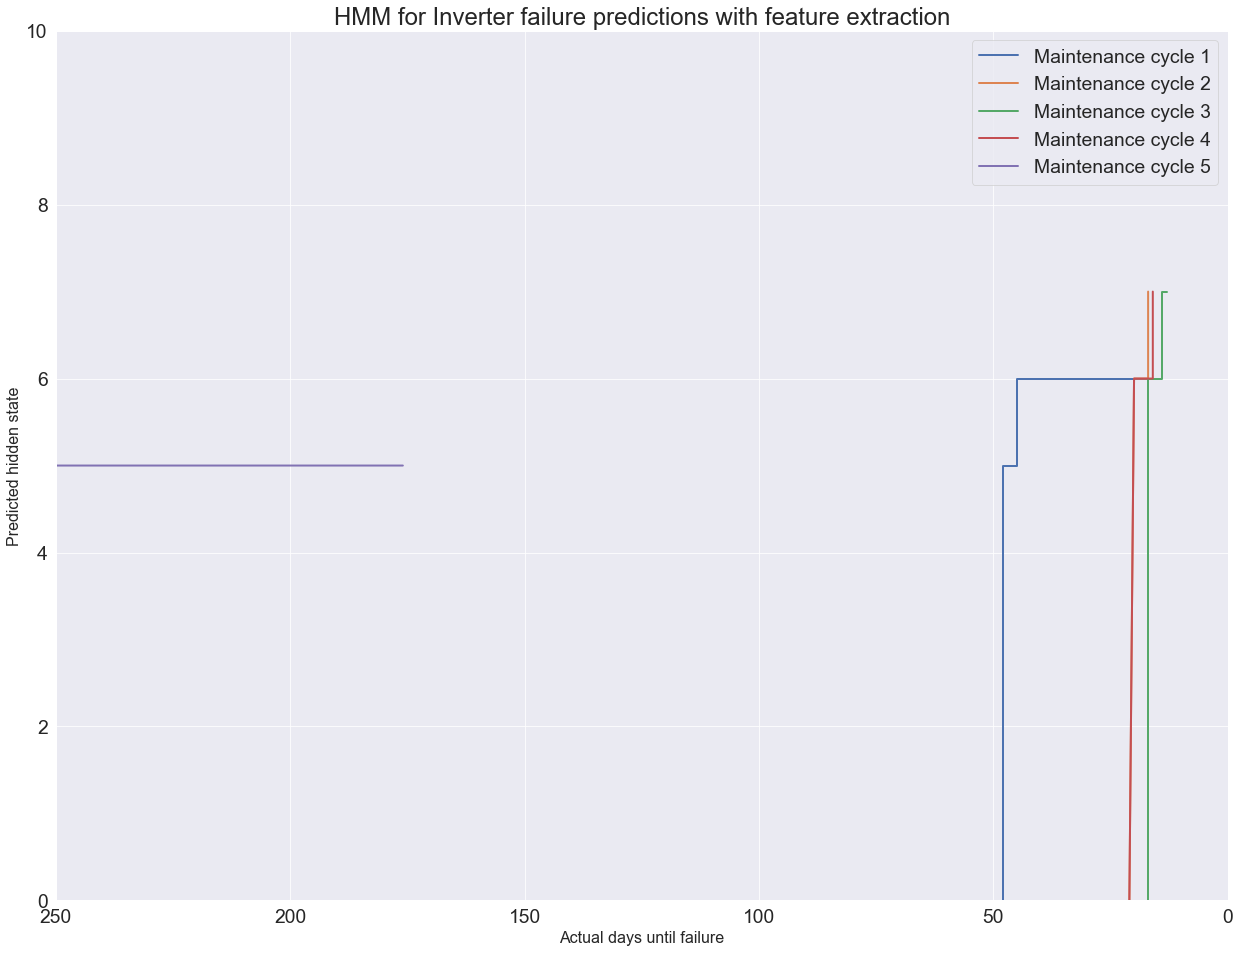

In [422]:
import numpy as np
figure(figsize=(16, 9), dpi=80)
fig, ax = plt.subplots()
for ind, res in enumerate([32,1,2,3,4]):
    ind += 1
    plt.plot(refs[res],predictions[res], label = 'Maintenance cycle %s'%ind, linewidth = 2)      
plt.ylabel('Predicted hidden state', fontsize = 16)
plt.legend()
plt.xlabel('Actual days until failure', fontsize = 16)
plt.title('HMM for Inverter failure predictions with feature extraction', fontsize = 24)
ax.set_xlim(250,0)
ax.set_ylim(0,10)
#plt.savefig('HMM_Inv_10_3_diag_invax')
plt.show()        

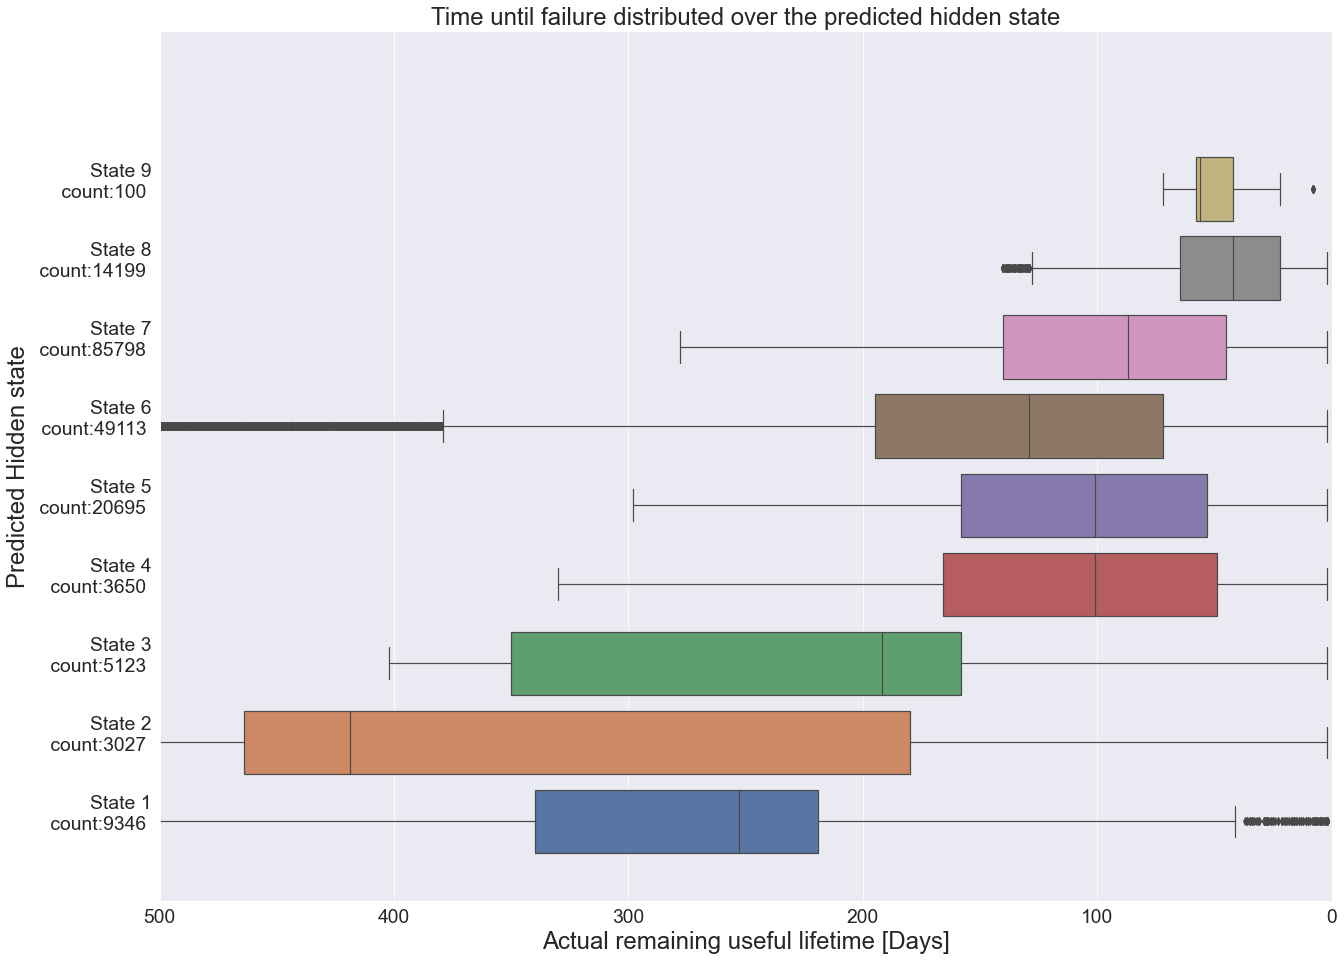

In [423]:
import numpy as np
plotdf = pd.DataFrame()
ruls = []
states = []
reslist = [[] for num in range(11)]
for res in range(len(predictions)):
    for ind, val in enumerate(predictions[res]):
        reslist[val].append(refs[res][ind][0])
        ruls.append(refs[res][ind][0])
        states.append(val)
        
plotdf['ruls'] = ruls
plotdf['state'] = states

allstates = range(15)
sns.set(rc={"figure.figsize":(21, 16)})
sns.set_context("paper", font_scale=2.2) 

#plt.xlabel('Count = %d'%len(reslist))
#plt.ylabel('RUL')
#plt.title('HMM for Inverter failure predictions with feature extraction')
cax = sns.boxplot(x='ruls', y='state', data = plotdf, orient = 'h')
cax.set_ylabel('Predicted Hidden state', fontsize = 24)
cax.set_title('Time until failure distributed over the predicted hidden state', fontsize = 24)
cax.set_xlabel('Actual remaining useful lifetime [Days]', fontsize = 24)
cax.set_yticklabels(['State %s\n count:%d \n '%(state+1, len(reslist[state])) for state in np.unique(states)])
plt.xlim(500,0)
plt.ylim(-1,10)
fig = cax.get_figure()
fig.savefig('HMM_State_count_8_15_diag_flipped_x');

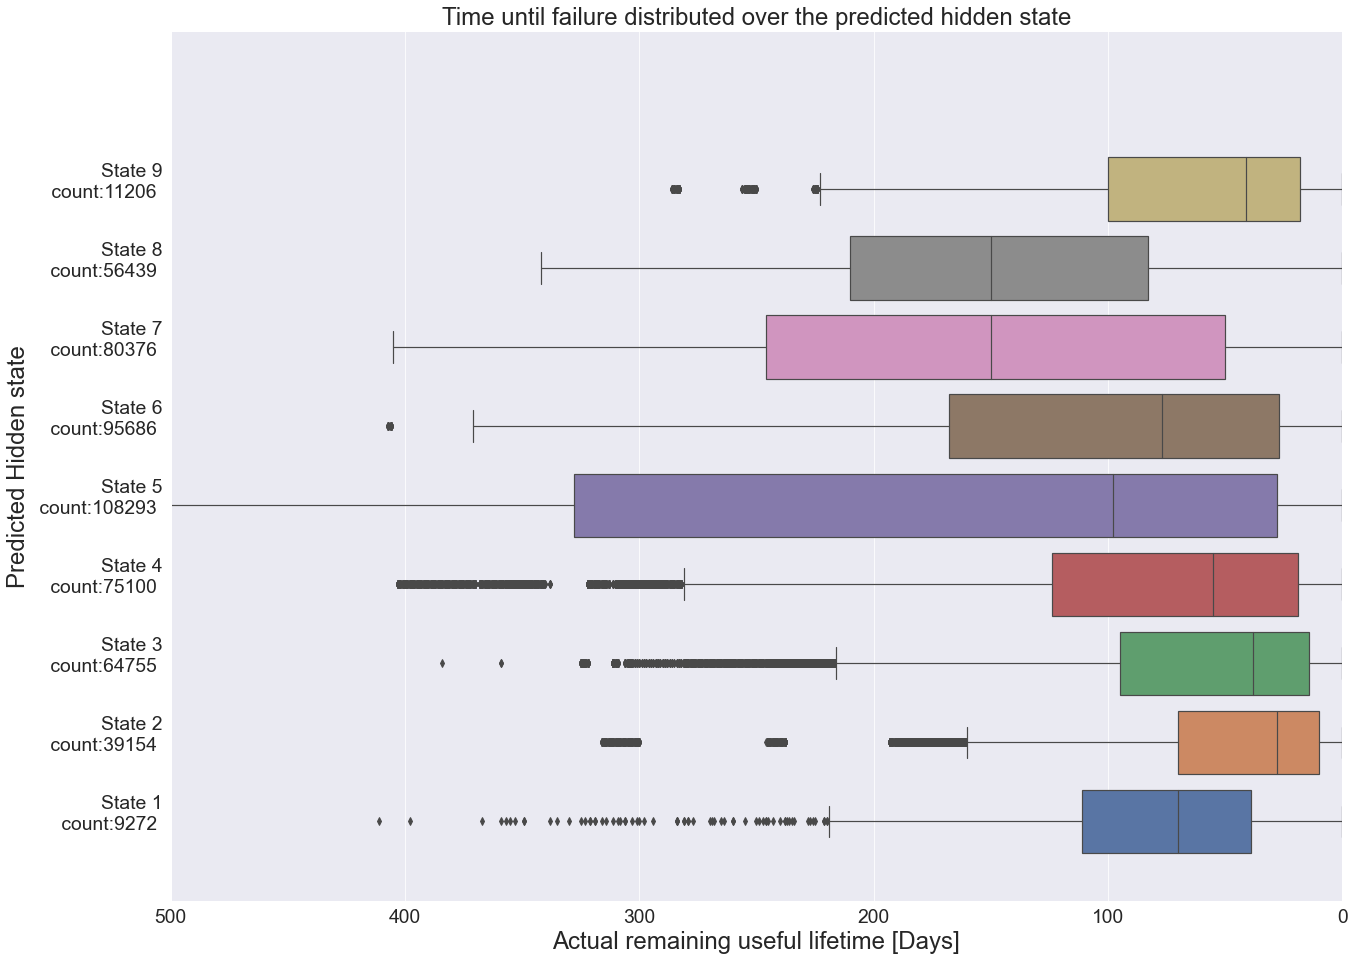

In [173]:
import numpy as np
plotdf = pd.DataFrame()
ruls = []
states = []
reslist = [[] for num in range(11)]
for res in range(len(predictions_trn)):
    for ind, val in enumerate(predictions_trn[res]):
        reslist[val].append(refs_trn[res][ind][0])
        ruls.append(refs_trn[res][ind][0])
        states.append(val)
        
plotdf['ruls'] = ruls
plotdf['state'] = states

allstates = range(15)
sns.set(rc={"figure.figsize":(21, 16)})
sns.set_context("paper", font_scale=2.2) 

#plt.xlabel('Count = %d'%len(reslist))
#plt.ylabel('RUL')
#plt.title('HMM for Inverter failure predictions with feature extraction')
cax = sns.boxplot(x='ruls', y='state', data = plotdf, orient = 'h')
cax.set_ylabel('Predicted Hidden state', fontsize = 24)
cax.set_title('Time until failure distributed over the predicted hidden state for Training data', fontsize = 24)
cax.set_xlabel('Actual remaining useful lifetime [Days]', fontsize = 24)
cax.set_yticklabels(['State %s\n count:%d \n '%(state+1, len(reslist[state])) for state in np.unique(states)])
plt.xlim(500,0)
plt.ylim(-1,10)
fig = cax.get_figure()
fig.savefig('HMM_State_count_8_15_diag_flipped_x');

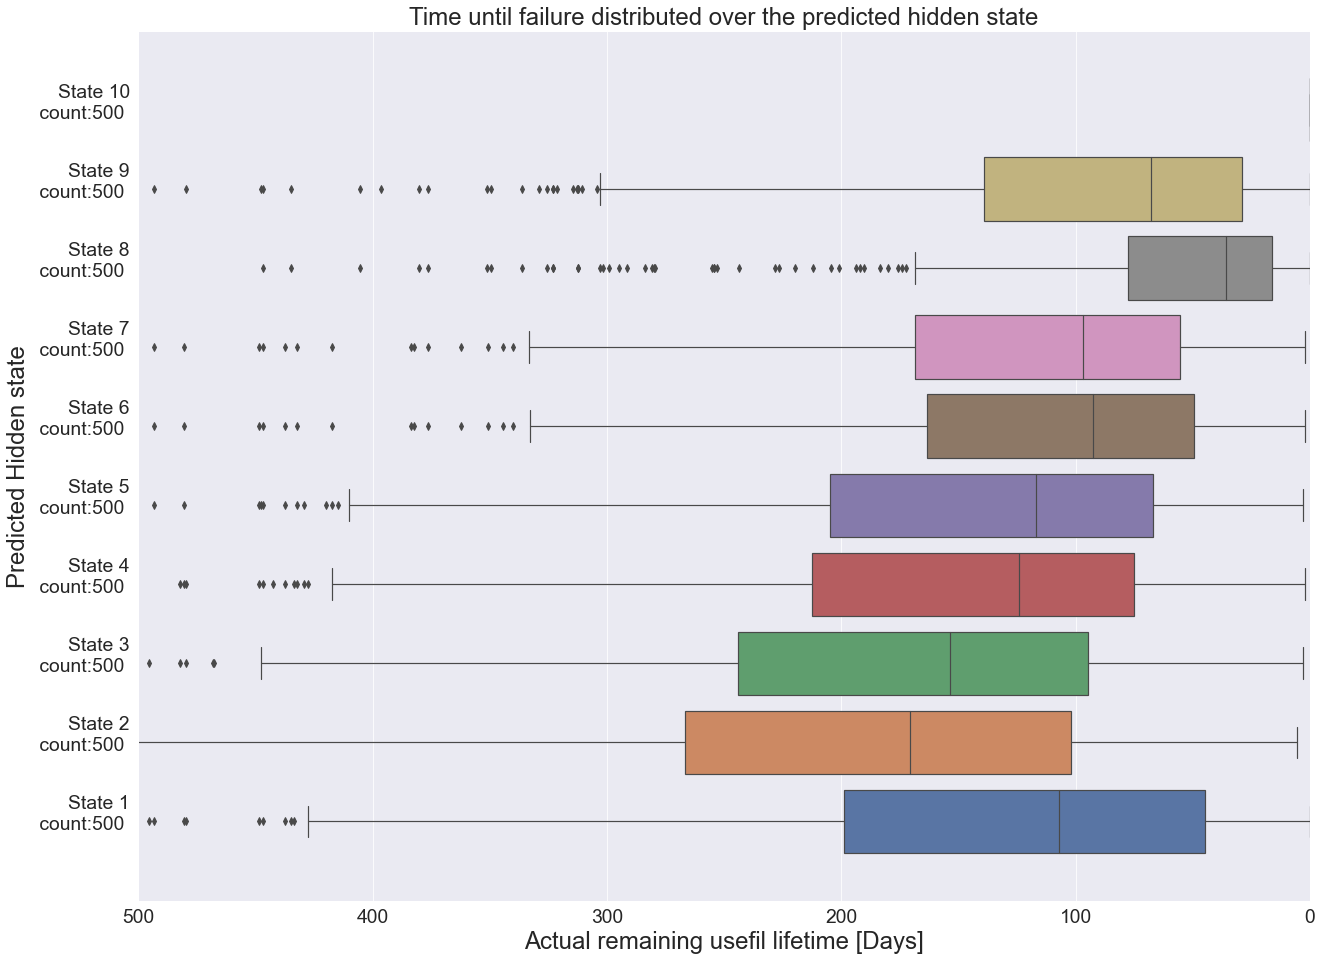

In [1578]:
import numpy as np
plotdf = pd.DataFrame()
ruls = []
states = []
reslist = [[] for num in range(10)]
for state_mc in range(len(mc_tst)):
    for rul in mc_tst[state_mc]:
        reslist[state_mc].append(rul)
        ruls.append(rul)
        states.append(state_mc)
        
plotdf['ruls'] = ruls
plotdf['state'] = states

allstates = range(15)
sns.set(rc={"figure.figsize":(21, 16)})
sns.set_context("paper", font_scale=2.2) 

#plt.xlabel('Count = %d'%len(reslist))
#plt.ylabel('RUL')
#plt.title('HMM for Inverter failure predictions with feature extraction')
cax = sns.boxplot(x='ruls', y='state', data = plotdf, orient = 'h')
cax.set_ylabel('Predicted Hidden state', fontsize = 24)
cax.set_title('Time until failure distributed over the predicted hidden state', fontsize = 24)
cax.set_xlabel('Actual remaining usefil lifetime [Days]', fontsize = 24)
cax.set_yticklabels(['State %s\n count:%d \n '%(state+1, len(reslist[state])) for state in np.unique(states)])
plt.xlim(500,0)
plt.ylim(-1,10)
fig = cax.get_figure()
fig.savefig('HMM_MC_State_count_3_10_flipped_x');

In [ ]:
import numpy as np
plotdf_trn = pd.DataFrame()
ruls = []
states = []
reslist = [[] for num in range(15)]
for res in range(len(preds_trn)):
    for ind, val in enumerate(preds_trn[res]):
        reslist[val].append(refs_trn[res][ind][0])
        ruls.append(refs_trn[res][ind][0])
        states.append(val)
        
plotdf_trn['ruls'] = ruls
plotdf_trn['state'] = states

allstates = range(15)
sns.set(rc={"figure.figsize":(21, 16)})
sns.set_context("paper", font_scale=1.5) 

#plt.xlabel('Count = %d'%len(reslist))
#plt.ylabel('RUL')
#plt.title('HMM for Inverter failure predictions with feature extraction')
cax = sns.boxplot(y='ruls', x='state', data = plotdf_trn)
cax.set_xlabel('Predicted Hidden state', fontsize = 24)
cax.set_ylabel('Actual remaining usefil lifetime [Days]', fontsize = 24)
cax.set_xticklabels(['State %s\n count=%d \n '%(state+1, len(reslist[state])) for state in np.unique(states)])
fig = cax.get_figure()
#fig.savefig('HMM_State_count');

In [ ]:
stats = pd.DataFrame()
stats['state'] = states
stats['RULs'] = ruls

In [1785]:
correls = []
for state in range(10):
    correls.append([])
    for sec_state in range(10):
        if state != sec_state:
            times = []
            states = []
            newdf_a = pd.DataFrame()
            maxlen = min([len(plotdf[(plotdf['state'] == state)]),len(plotdf[(plotdf['state'] == sec_state)])])
            states.extend(plotdf[(plotdf['state'] == state)]['state'][:maxlen])
            states.extend(plotdf[(plotdf['state'] == sec_state)]['state'][:maxlen])
            times.extend(plotdf[(plotdf['state'] == state)]['ruls'][:maxlen])
            times.extend(plotdf[(plotdf['state'] == sec_state)]['ruls'][:maxlen])
            newdf_a['state'] = states
            newdf_a['RULs'] = times
            a = posthoc_wilcoxon(newdf_a, p_adjust = 'bonferroni', group_col = 'state', val_col = 'RULs')
            correls[state].append(a[state][sec_state])
        else:
            correls[state].append(1)

In [ ]:
sns.heatmap(correls, vmax = 0.005)

In [1868]:
newdf = pd.DataFrame()
maxlen = 1150
times = []
states = []
for state in range(10):
    if state != 2:
        times.extend(plotdf[(plotdf['state'] == state)]['ruls'][:maxlen])
        states.extend(plotdf[(plotdf['state'] == state)]['state'][:maxlen]+1)
newdf['state'] = states
newdf['RULs'] = times

In [1869]:
from scikit_posthocs import posthoc_wilcoxon
c = posthoc_wilcoxon(newdf, p_adjust = 'bonferroni', group_col = 'state', val_col = 'RULs')

In [1870]:
for col in c.columns:    
    c[col] = c[(c[col]>0.01)][col]

<AxesSubplot:>

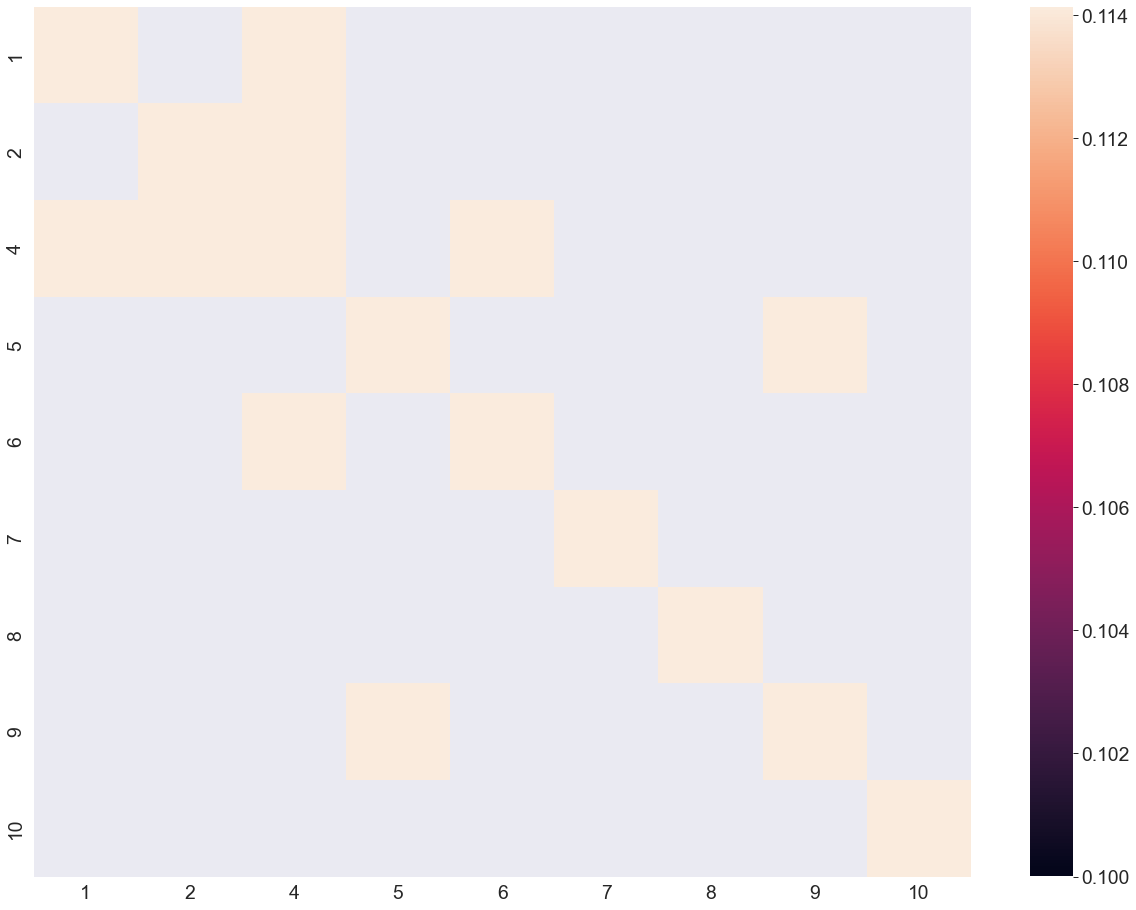

In [1747]:
sns.heatmap(c, vmax = 0.1)

In [1096]:
trn_sims, output = make_rul_preds_mean_mc(preds_trn, lr, n_states = 10)

C:\Users\Prevas\AppData\Local\Temp/ipykernel_56668/1955560348.py:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\Prevas\AppData\Local\Temp/ipykernel_56668/1955560348.py:27: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



169.93192307692308
203.1796153846154
195.81692307692308
161.93076923076922
197.07346153846152
134.03115384615384
161.68115384615382
127.12423076923078
58.698461538461544
0.0


In [174]:
import copy
def make_rul_preds_mean(preds, preds_train, refs_train, n_states = 10):
    mean_vals = []
    output = np.array(copy.copy(preds))
    for state in range(1,(n_states+1)):
        ruls = []
        for ind in range(len(preds_train)):
            if preds_train[ind] == state:
                ruls.append(refs_train[ind])
        state_mean = np.mean(ruls)
        output = np.where(output == state, state_mean, output)
        mean_vals.append(state_mean) 
        print(state_mean)
    return output      

In [175]:
times = make_rul_preds_mean(flatten(preds_n), flatten(predictions_trn), flatten(refs_trn))

50.090616539817134
63.58569994595012
82.83151797603196
167.01215221667144
107.59354555525364
155.64916144122623
146.37376636722834
68.88113510619311
nan
nan


C:\Users\gogd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning:

Mean of empty slice.

C:\Users\gogd\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning:

invalid value encountered in double_scalars



In [144]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [ ]:
preds_trn_flat = flatten(preds_trn)
refs_trn_flat = flatten(refs_trn)

In [ ]:
refs_trn_flat = flatten(refs_trn)

In [288]:
preds_flat = flatten(preds_n)

In [289]:
refs_flat = flatten(refs_n)

In [424]:
LastPoint_states_2 = []
LastPoint_RUL_2 = []
for cyc in range(len(predictions)):
    LastPoint_states_2.append(predictions[cyc][-1])
    LastPoint_RUL_2.append(refs[cyc][-1])

In [425]:
def risk_classes(pred):
    res = copy.copy(pred)
    res = np.where(res<=5,0,res)
    res = np.where(np.logical_and(res>5, res<=20),1,res)
    res = np.where(res>20,2,res)
    return res

In [443]:
def risk_classes_hmm(pred):
    res = copy.copy(pred)
    res = np.where(res<=4,2,res)
    res = np.where(np.logical_and(res>4, res<=7),1,res)
    res = np.where(res>7,0,res)
    return res

In [404]:
forest_classes = risk_classes(y_pred_forest)

In [405]:
gt_classes_rf = risk_classes(y_test)

In [444]:
hmm_classes_n = risk_classes_hmm(np.array(LastPoint_states_2))

In [428]:
gt_classes_hmm_n = risk_classes(np.array(LastPoint_RUL_2))

In [294]:
from sklearn.metrics import f1_score

In [456]:
f1_rf = f1_score(gt_classes_rf, forest_classes, average = 'macro')
print('f1-score for TSFRESH-RFR method: ', f1_rf)

f1-score for TSFRESH-RFR method:  0.5701043959987636


In [454]:
# MED 6+7 i group 2: 0,82
f1_hmm = f1_score(gt_classes_hmm, hmm_classes, average = 'micro')
print('f1-score for PCA HMM method: ',f1_hmm)

f1-score for PCA HMM method:  0.42272727272727273


In [203]:
from sklearn.metrics import confusion_matrix

In [460]:
hmm_confmat = confusion_matrix(gt_classes_hmm_n, hmm_classes_n)

array([[ 0, 66,  8],
       [ 1, 60,  8],
       [ 5, 67,  5]], dtype=int64)

In [406]:
rf_confmat = confusion_matrix(gt_classes_rf, forest_classes)

array([[54, 55,  5],
       [ 2, 51, 19],
       [ 1, 25, 34]], dtype=int64)

In [474]:
sns.set(font_scale=3)

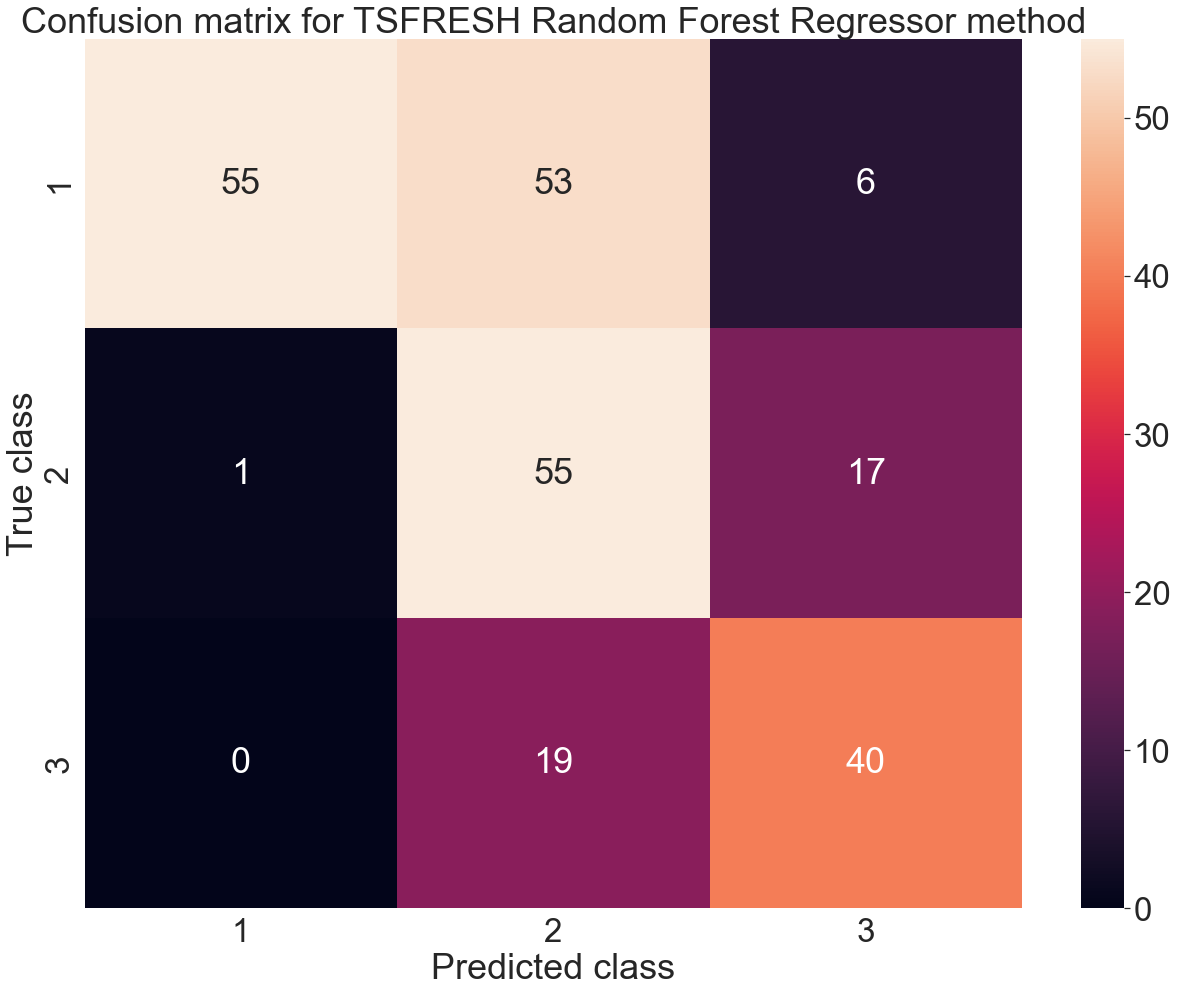

In [503]:
a = sns.heatmap(rf_confmat, annot = True,yticklabels = range(1,4),xticklabels = range(1,4))
a.set_xlabel('Predicted class')
a.set_ylabel('True class')
a.set_title('Confusion matrix for TSFRESH Random Forest Regressor method')
plt.savefig('RF_Confplot')

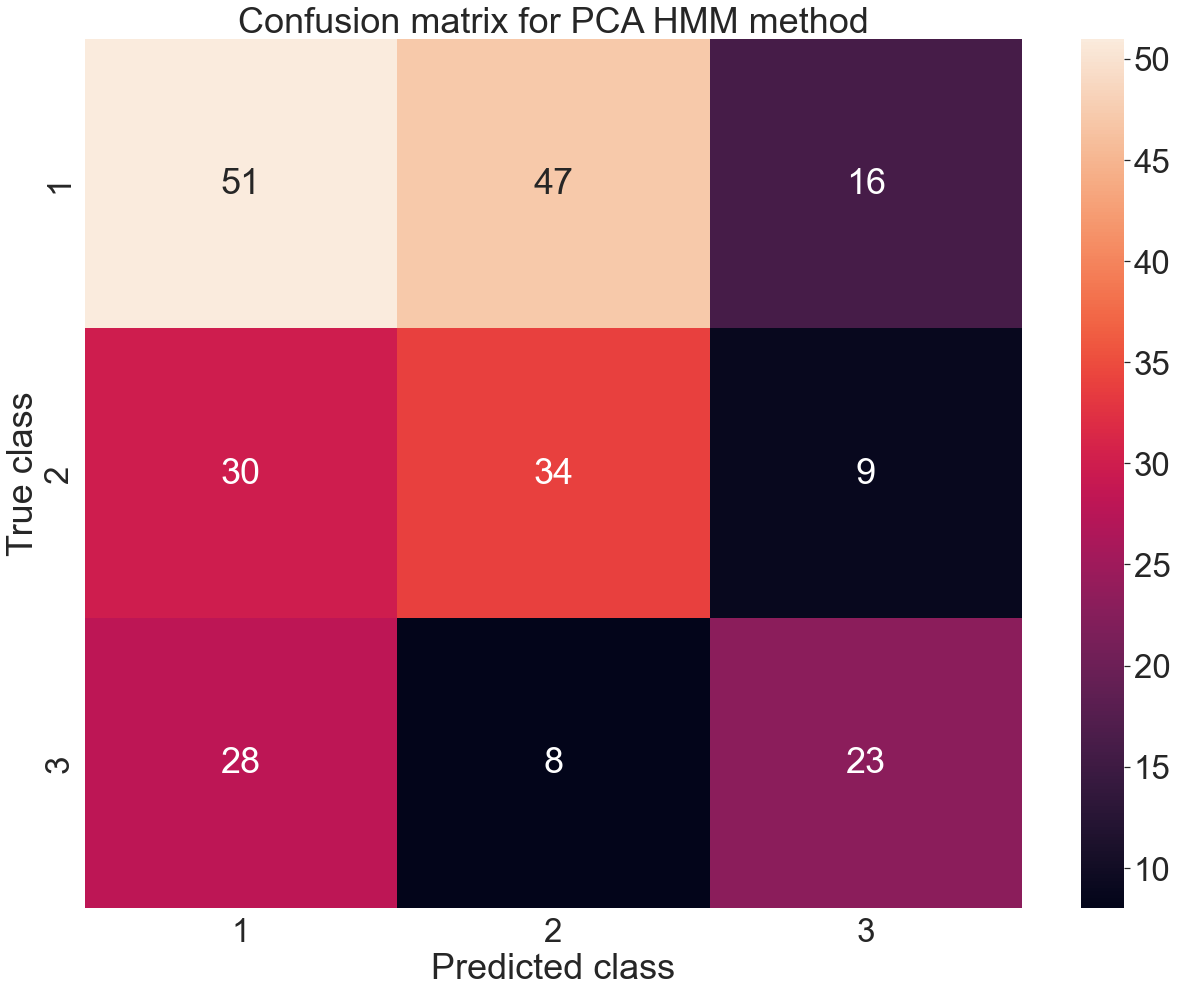

In [506]:
b = sns.heatmap(hmm_confmat, annot = True,yticklabels = range(1,4),xticklabels = range(1,4))
b.set_xlabel('Predicted class')
b.set_ylabel('True class')
b.set_title('Confusion matrix for PCA HMM method')
plt.savefig('HMM_confmat')

In [1308]:
mean_est = make_rul_preds_mean(preds_flat, preds_trn_flat, y_hmm_trn['RUL'].values, n_states = 10)

114.92998015701838
102.6906976744186
96.35510940201515
83.07103981339614
108.04235134250987
92.85343892249173
215.35163839858535
111.25518642734632
82.33846546543063
nan


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning:

Mean of empty slice.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning:

invalid value encountered in double_scalars



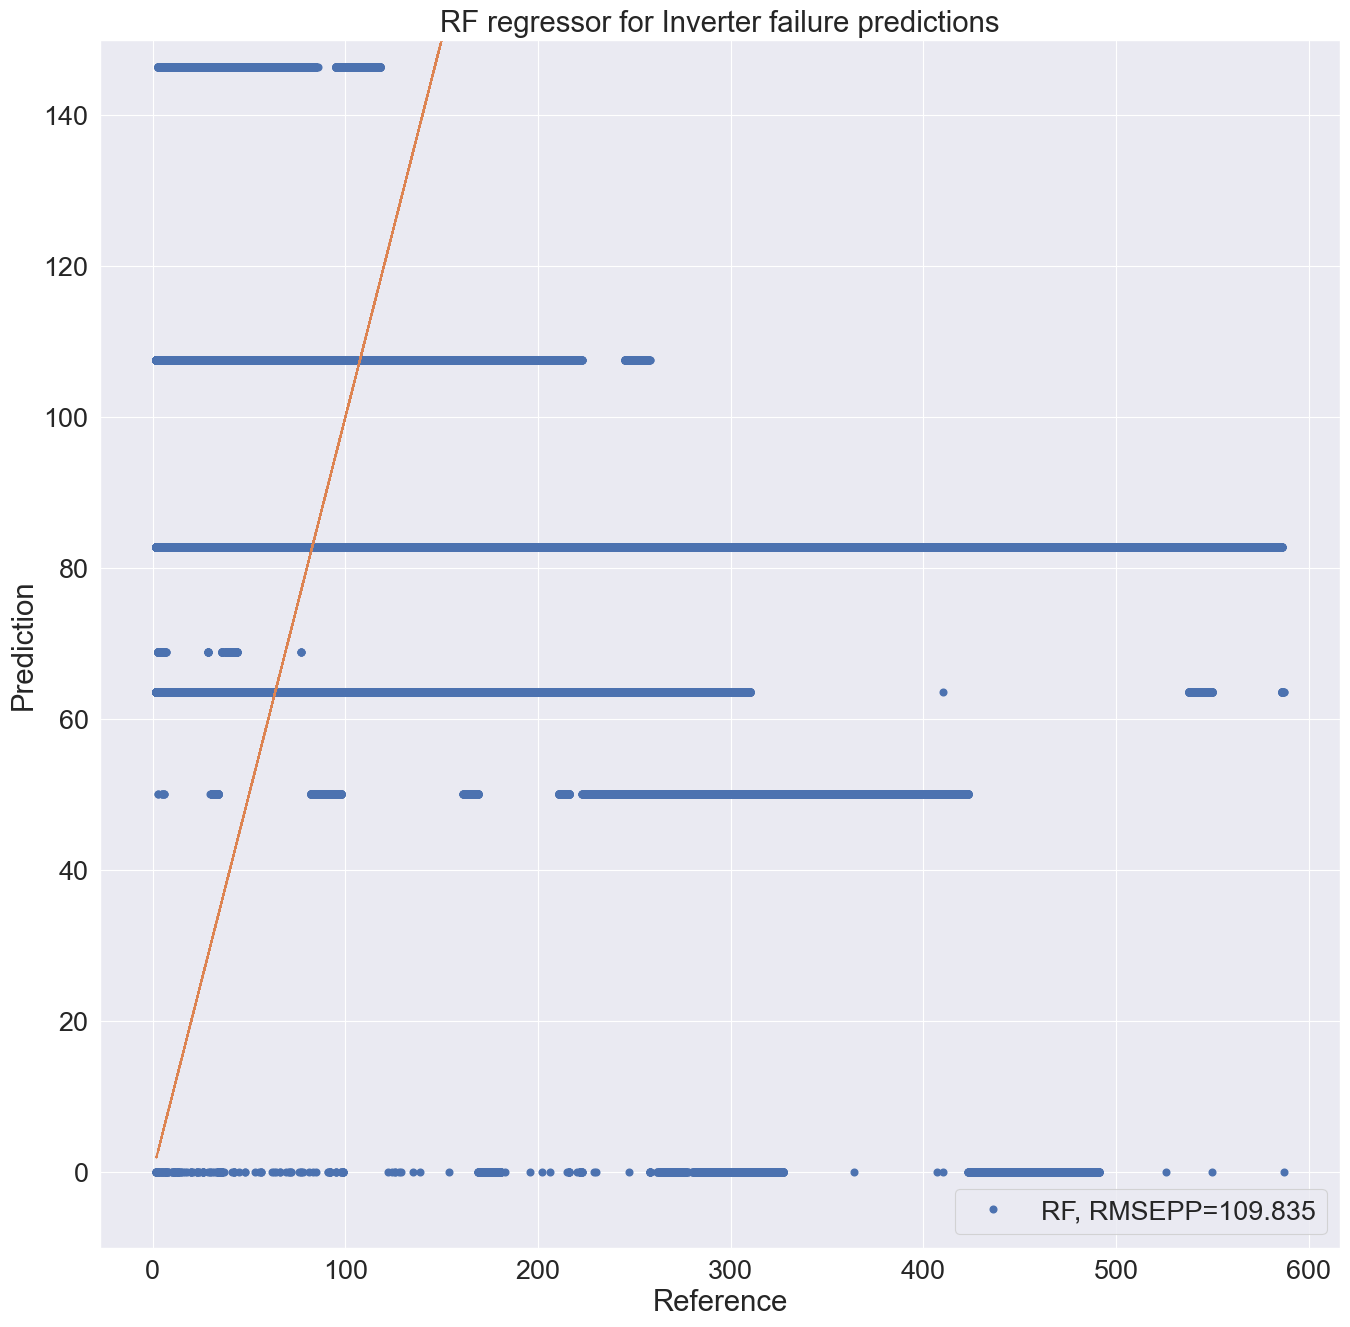

MSE test: 17826.419
RMSE test: 133.516
R^2 test: -0.450


In [178]:
#RMSEPP_rf = np.sqrt(np.mean(np.power(refs_flat-mean_est, 2)))
plt.figure(1, figsize=(16,16), frameon=False, dpi=100)
plt.plot(refs_flat, times, 'o', label="RF, RMSEPP=109.835".format(RMSEPP_rf))
plt.plot(refs_flat, refs_flat, '--')
plt.xlabel('Reference')
plt.ylabel('Prediction')
plt.title('RF regressor for Inverter failure predictions')
plt.legend(loc='lower right')
#plt.savefig('RF_Inv')
plt.ylim(-10, 150)
plt.show()

print('MSE test: %.3f' % (
        # mean_squared_error(y_train, y_train_pred),
        mean_squared_error(refs_flat, times)))
print('RMSE test: %.3f' % (
        # np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(refs_flat, times))))
print('R^2 test: %.3f' % (
        # r2_score(y_train, y_train_pred),
        r2_score(refs_flat, times)))

In [1363]:
def make_rul_preds_hit(preds, model, n_states = 10):
    mean_vals = []
    output = np.array(copy.copy(preds))
    iters= [0 for i in range(n_states)]
    for state in range(n_states-1,0,-1):
        # Iterating beckwards through all states - starting at the second to last state and going forwards
        
        ruls = []
        transmat = model.transmat_
        probs = transmat[state-1]
        steps = 1
        
        for ind in range(len(probs)):
            # Iterating through the probabilities of going to the other states
            
            if (ind+1) != state:
                
                # p_ij m_jA - iters is the number of steps from the potential state to state 10
                steps += probs[ind] * iters[ind]
        # Dividing the sum of p_ij m_jAp_ij by (1-p_i), 1 - probability of staying in current state
        iters[state-1] = (steps/(1 - probs[state-1]))/26
        # /26 for 26 samples per day to get RUL in days
        print(iters)
        output = np.where(output == state, steps, output)
        mean_vals.append(iters[state-1])  
    return output

In [1364]:
hit_time = make_rul_preds_hit(preds_flat, lr, n_states = 10)

[0, 0, 0, 0, 0, 0, 0, 0, 102.05835415739959, 0]
[0, 0, 0, 0, 0, 0, 0, 41.605886922089226, 102.05835415739959, 0]
[0, 0, 0, 0, 0, 0, 57.51416314037018, 41.605886922089226, 102.05835415739959, 0]
[0, 0, 0, 0, 0, 27.41358990303503, 57.51416314037018, 41.605886922089226, 102.05835415739959, 0]
[0, 0, 0, 0, 36.38585730538583, 27.41358990303503, 57.51416314037018, 41.605886922089226, 102.05835415739959, 0]
[0, 0, 0, 59.01808331701629, 36.38585730538583, 27.41358990303503, 57.51416314037018, 41.605886922089226, 102.05835415739959, 0]
[0, 0, 42.16832936050574, 59.01808331701629, 36.38585730538583, 27.41358990303503, 57.51416314037018, 41.605886922089226, 102.05835415739959, 0]
[0, 36.63438747690618, 42.16832936050574, 59.01808331701629, 36.38585730538583, 27.41358990303503, 57.51416314037018, 41.605886922089226, 102.05835415739959, 0]
[5.718909036163368, 36.63438747690618, 42.16832936050574, 59.01808331701629, 36.38585730538583, 27.41358990303503, 57.51416314037018, 41.605886922089226, 102.058

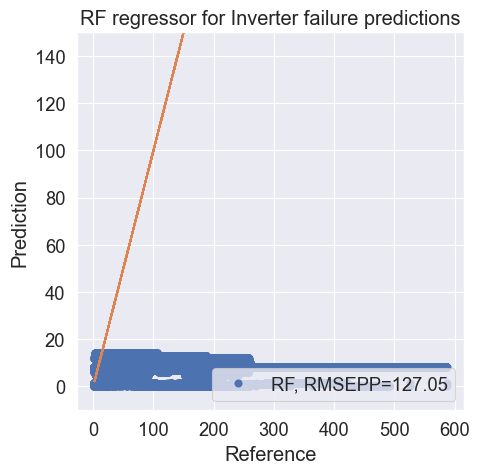

MSE test: 25465.720
RMSE test: 159.580
R^2 test: -1.409


In [1055]:
#RMSEPP_rf = np.sqrt(np.mean(np.power(refs_flat-hit_time, 2)))
plt.figure(1, figsize=(5, 5), frameon=False, dpi=100)
plt.plot(refs_flat, hit_time, 'o', label="RF, RMSEPP={0:.2f}".format(RMSEPP_rf))
plt.plot(refs_flat, refs_flat, '--')
plt.xlabel('Reference')
plt.ylabel('Prediction')
plt.ylim(-10, 150)
plt.title('RF regressor for Inverter failure predictions')
plt.legend(loc='lower right')
#plt.savefig('RF_Inv')
plt.show()

print('MSE test: %.3f' % (
        # mean_squared_error(y_train, y_train_pred),
        mean_squared_error(refs_flat, hit_time)))
print('RMSE test: %.3f' % (
        # np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(refs_flat, hit_time))))
print('R^2 test: %.3f' % (
        # r2_score(y_train, y_train_pred),
        r2_score(refs_flat, hit_time)))

In [1230]:
from numpy.random import choice
def make_rul_preds_mean_mc(preds, model,n_states = 10, n_sims = 100, max_iter = 24000):
    mean_vals = []
    var = []
    results = []
    output = np.array(copy.copy(preds))
    transmat = model.transmat_
    for state in tqdm(range(1,(n_states+1))):
        # State = S_n. Iterates through all the states to simulate their transition to the failed, final state
        ruls = []
        for rs in range(n_sims):
            # Runs n_sims simulations of the transition from the state S_n.
            steps = 0
            cur_state = state
            rd = np.random.RandomState(rs)
            while steps < max_iter and cur_state < n_states:
                # Simulates how many steps it takes from the state S_n to the final state, while updating the current state
                # and using the probabilities from that new, current state accordningly
                cur_state = rd.choice(np.arange(1, n_states+1), 1, p=transmat[cur_state-1])[0]
                steps += 1
            ruls.append(steps)
        # takes the mean value of the hitting times for the simulations and updates the predicted states to be this mean value
        ruls = [rul/26 for rul in ruls]
        results.append(ruls)
        var.append(np.std(ruls))
        state_mean = np.mean(ruls)
        output = np.where(output == state, state_mean, output)
        mean_vals.append(state_mean)
        print(state_mean)
    return results, output

In [1348]:
predictions_flat = flatten(predictions)

In [1349]:
mc_tst, mean_est_mc = make_rul_preds_mean_mc(predictions_flat, lr, n_states = 10, n_sims = 500, max_iter = 100000)

 10%|█         | 1/10 [01:52<16:50, 112.26s/it]

136.15907692307692


 20%|██        | 2/10 [04:03<16:26, 123.28s/it]

194.1986923076923


 30%|███       | 3/10 [06:05<14:19, 122.73s/it]

179.55646153846155


 40%|████      | 4/10 [07:36<11:02, 110.39s/it]

156.33692307692309


 50%|█████     | 5/10 [09:06<08:35, 103.01s/it]

145.48938461538464


 60%|██████    | 6/10 [10:16<06:06, 91.70s/it] 

121.74161538461537


 70%|███████   | 7/10 [11:33<04:20, 86.77s/it]

125.97507692307694


 80%|████████  | 8/10 [12:09<02:21, 70.89s/it]

63.49938461538461


100%|██████████| 10/10 [13:11<00:00, 79.12s/it]

98.35684615384615
0.0


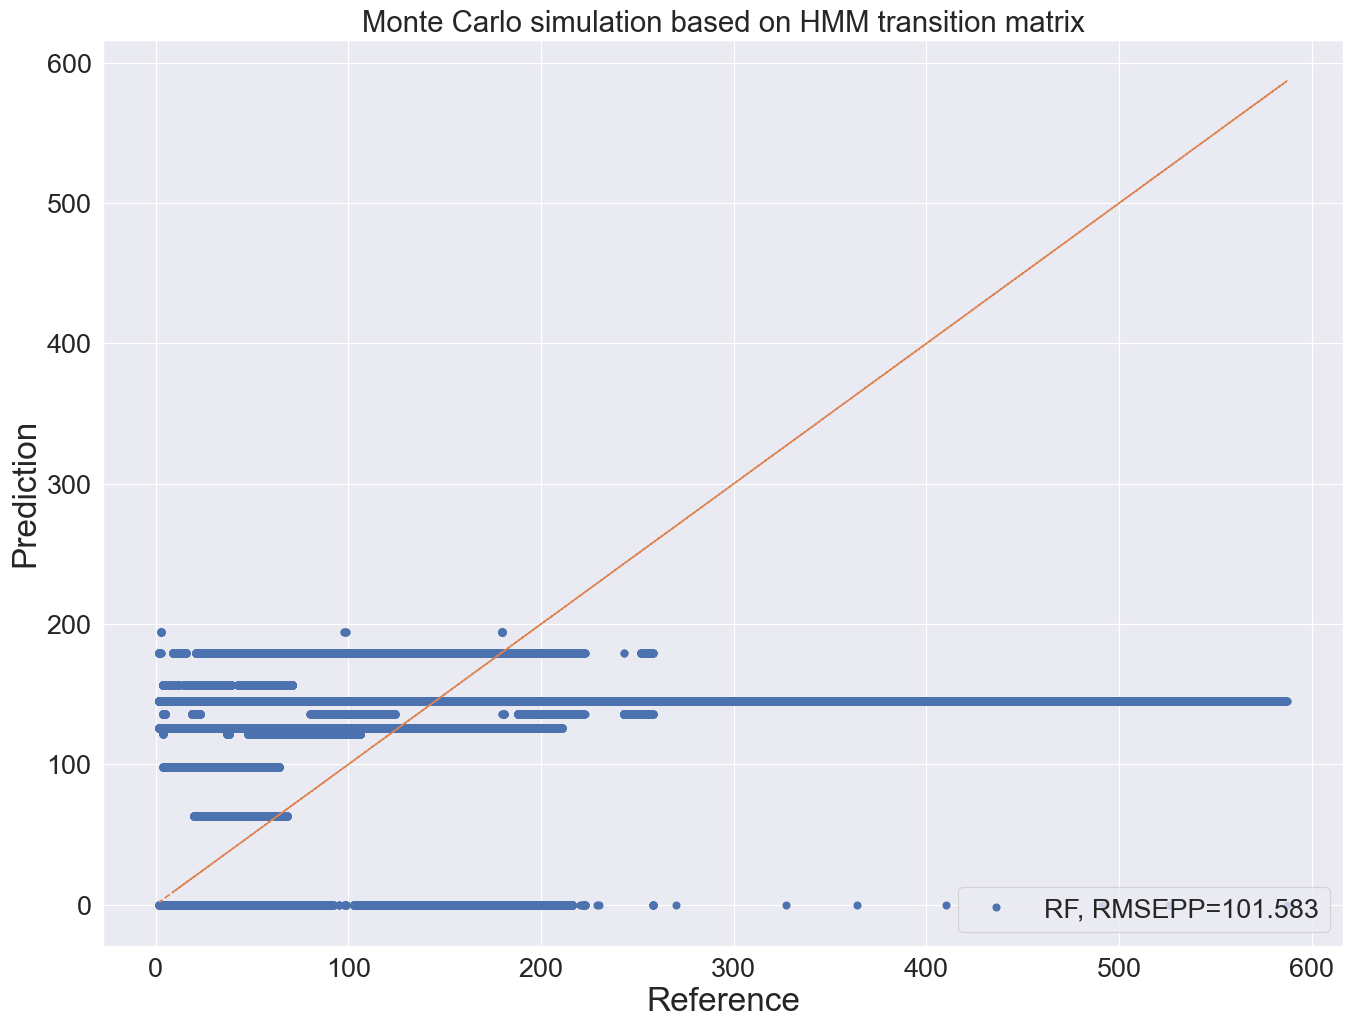

MSE test: 10319.074
RMSE test: 101.583
R^2 test: 0.024


In [1358]:
#RMSEPP_rf = np.sqrt(np.mean(np.power(refs_flat-mean_est_mc, 2)))
plt.figure(1, figsize=(16,12), frameon=False, dpi=100)
plt.plot(refs_flat, mean_est_mc, 'o', label="RF, RMSEPP=101.583".format(RMSEPP_rf))
plt.plot(refs_flat, refs_flat, '--')
plt.xlabel('Reference', fontsize = 24)
plt.ylabel('Prediction', fontsize = 24)
plt.title('Monte Carlo simulation based on HMM transition matrix')
plt.legend(loc='lower right')
plt.savefig('RF_Inv_MC')
plt.show()

print('MSE test: %.3f' % (
        # mean_squared_error(y_train, y_train_pred),
        mean_squared_error(refs_flat, mean_est_mc)))
print('RMSE test: %.3f' % (
        # np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(refs_flat, mean_est_mc))))
print('R^2 test: %.3f' % (
        # r2_score(y_train, y_train_pred),
        r2_score(refs_flat, mean_est_mc)))

In [140]:
source = []
target = []
value = []
for num in range(len(predictions)):
    for i in range(len(predictions[num])):
        if predictions[num][i]!=predictions[num][i-1] and i > 0 and len(predictions[num])>1:
            source.append(predictions[num][i-1])
            target.append(predictions[num][i])
            value.append(refs[num][i])

In [141]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [state for state in range(1,11)],
      color = "blue"
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value,
    hovertemplate='This link has total value %{value}<extra></extra>'
  ))])

fig.update_layout(title_text="Sankey plot for state transition", font_size=20, title_x=0.5)
fig.show()